# **Final Project: Solving Edutech Company Problems**

 **Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech**

*   Nama: Aditya Yoga Adhiputra
*   Email: adityayogoal33@gmail.com
*   Id Dicoding: adityayogal33

## **Preparation**

**Preparing the required libraries**

1. **Library for data manipulation**

2. **Library for Processing Data**

3. **Library for Modeling, Visualize Data, and Exporting Model**


In [1]:
# Library for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Library Data Preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Library for Modeling and Evaluation
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
import shap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
from joblib import dump

**Prepare the data to be used**

In [4]:
df = pd.read_csv('data.csv', delimiter=";")
pd.set_option('display.max_columns', None)

In [5]:
df.head(7)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate


## **Data Understanding**

This phase focuses on understanding the data types, business context, and overall structure of the dataset.

**Objectives:**

- ✅ Identify the types of data (categorical, numerical, date, etc.)
- ✅ Understand the context and meaning behind each variable

**Dataset Description** :

`Marital status` - The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated

`Application mode` - The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International).

`Application order` - The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice).

`Course` - The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance).

`Daytime/evening attendance` - Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening.

`Previous qualification` - The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle).

`Previous qualification (grade)` - Grade of previous qualification (between 0 and 200).

`Nacionality` - The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian.


`Mother's qualification` - The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)

`Father's qualification` - The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle).


`Mother's occupation` - The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants

`Father's occupation` - The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers.

`Admission grade` - Admission grade (between 0 and 200)

`Displaced` - Whether the student is a displaced person. (Categorical) 1 – yes 0 – no

`Educational special needs` - Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no

`Debtor` - Whether the student is a debtor. (Categorical) 1 – yes 0 – no

`Tuition fees up to date` - Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 –

`Gender` - The gender of the student. (Categorical) 1 – male 0 – female

`Scholarship holder` - Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no

`Age at enrollment` - The age of the student at the time of enrollment. (Numerical)

`International` - Whether the student is an international student. (Categorical) 1 – yes 0 – no

`Curricular units 1st sem (credited)` -The number of curricular units credited by the student in the first semester. (Numerical)

`Curricular units 1st sem (enrolled)` - The number of curricular units enrolled by the student in the first semester. (Numerical)

`Curricular units 1st sem (evaluations)` - The number of curricular units evaluated by the student in the first semester. (Numerical)

`Curricular units 1st sem (approved)` -The number of curricular units approved by the student in the first semester. (Numerical)


In [6]:
# Showing information from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [7]:
#Checking missing value
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [8]:
# Checking duplicated value
df.duplicated().sum()

np.int64(0)

In [9]:
for col in df.columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 40)

Value counts for 'Marital_status':
Marital_status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
----------------------------------------
Value counts for 'Application_mode':
Application_mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64
----------------------------------------
Value counts for 'Application_order':
Application_order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64
----------------------------------------
Value counts for 'Course':
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64
-------------------------------------

In [10]:
for col in df.columns:
  print(f"Kolom {col} berisi sejumlah nilai {df[col].nunique()} yang unik/berbeda")

Kolom Marital_status berisi sejumlah nilai 6 yang unik/berbeda
Kolom Application_mode berisi sejumlah nilai 18 yang unik/berbeda
Kolom Application_order berisi sejumlah nilai 8 yang unik/berbeda
Kolom Course berisi sejumlah nilai 17 yang unik/berbeda
Kolom Daytime_evening_attendance berisi sejumlah nilai 2 yang unik/berbeda
Kolom Previous_qualification berisi sejumlah nilai 17 yang unik/berbeda
Kolom Previous_qualification_grade berisi sejumlah nilai 101 yang unik/berbeda
Kolom Nacionality berisi sejumlah nilai 21 yang unik/berbeda
Kolom Mothers_qualification berisi sejumlah nilai 29 yang unik/berbeda
Kolom Fathers_qualification berisi sejumlah nilai 34 yang unik/berbeda
Kolom Mothers_occupation berisi sejumlah nilai 32 yang unik/berbeda
Kolom Fathers_occupation berisi sejumlah nilai 46 yang unik/berbeda
Kolom Admission_grade berisi sejumlah nilai 620 yang unik/berbeda
Kolom Displaced berisi sejumlah nilai 2 yang unik/berbeda
Kolom Educational_special_needs berisi sejumlah nilai 2 yang

## **Data Preparation - First Iteraration**


### **Data Cleaning**

**Objective**

- ✅ Change the numeric value of the data into the original description
- ✅ Code Mapping from number to Descriptive Label

In [11]:
#Marial status
df['Marital_status'] = df['Marital_status'].map({1: "single", 2: "married", 3:"widower", 4:"divorced", 5:"facto union", 6:"legally separated"})
# application_mode
df['Application_mode'] = df['Application_mode'].map({
    1:  "1st phase - general contingent",
    2:  "Ordinance No. 612/93",
    5:  "1st phase - special contingent (Azores Island)",
    7:  "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st phase - special contingent (Madeira Island)",
    17: "2nd phase - general contingent",
    18: "3rd phase - general contingent",
    26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of course",
    44: "Technological specialization diploma holders",
    51: "Change of institution/course",
    53: "Short cycle diploma holders",
    57: "Change of institution/course (International)"
})


#course
df['Course'] = df['Course'].map({
  33 : 'Biofuel Production Technologies',
  171 : 'Animation and Multimedia Design',
  8014 : 'Social Service (evening attendance)',
  9003 : 'Agronomy',
  9070 : 'Communication Design',
  9085 : 'Veterinary Nursing',
  9119 : 'Informatics Engineering',
  9130 : 'Equinculture',
  9147 : 'Management',
  9238 :'Social Service',
  9254 : 'Tourism',
  9500 : 'Nursing',
  9556 : 'Oral Hygiene',
  9670 : 'Advertising and Marketing Management',
  9773 : 'Journalism and Communication',
  9853 : 'Basic Education',
  9991 : 'Management (evening attendance)'
})

#Daytime_evening_attendance
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].map({0 : 'daytime', 1 : 'evening'})

# Previous qualification
df['Previous_qualification'] = df['Previous_qualification'].map({
    1:  "Secondary Education",
    2:  "Higher Ed - Bachelor's",
    3:  "Higher Ed - Degree (Unspecified)",
    4:  "Higher Ed - Master's",
    5:  "Higher Ed - Doctorate",
    6:  "Ongoing Higher Education",
    9:  "Incomplete Secondary (12th)",
    10: "Incomplete Secondary (11th)",
    12: "Other - 11th Year",
    14: "10th Year of Schooling",
    15: "Incomplete Secondary (10th)",
    19: "Basic Ed - 3rd Cycle (9th-11th)",
    38: "Basic Ed - 2nd Cycle (6th-8th)",
    39: "Technological Specialization",
    40: "Higher Ed - Degree (1st Cycle)",
    42: "Professional Technical Course",
    43: "Higher Ed - Master (2nd Cycle)"
})

In [12]:
parents_qualification = {
1 : "Secondary Education - 12th Year of Schooling or Eq.",
2 : "Higher Education - Bachelor's Degree",
3 : "Higher Education - Degree",
4 : "Higher Education - Master's",
5 : "Higher Education - Doctorate",
6 : "Frequency of Higher Education",
9 : "12th Year of Schooling - Not Completed",
10 : "11th Year of Schooling - Not Completed",
11 : "7th Year (Old)",
12 : "Other - 11th Year of Schooling",
13 : "2nd year complementary high school course",
14 : "10th Year of Schooling",
18 : "General commerce course",
19 : "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
20 : "Complementary High School Course",
22 : "Technical-professional course",
25 : "Complementary High School Course - not concluded",
26 : "7th year of schooling",
27 : "2nd cycle of the general high school course",
29 : "9th Year of Schooling - Not Completed",
30 : "8th year of schooling",
31 : "General Course of Administration and Commerce",
33 : "Supplementary Accounting and Administration",
34 : "Unknown",
35 : "Can't read or write",
36 : "Can read without having a 4th year of schooling",
37 : "Basic education 1st cycle (4th/5th year) or equiv.",
38 : "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
39 : "Technological specialization course",
40 : "Higher education - degree (1st cycle)",
41 : "Specialized higher studies course",
42 : "Professional higher technical course",
43 : "Higher Education - Master (2nd cycle)",
44 : "Higher Education - Doctorate (3rd cycle)"
}

# Mothers qualificaion
df['Mothers_qualification'] = df['Mothers_qualification'].map(parents_qualification)

# Father qualification
df['Fathers_qualification'] = df['Fathers_qualification'].map(parents_qualification)

In [13]:
# parets ocupation
parents_ocupation = {
0 : "Student",
1 : "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
2 : "Specialists in Intellectual and Scientific Activities",
3 : "Intermediate Level Technicians and Professions",
4 : "Administrative staff",
5 : "Personal Services, Security and Safety Workers and Sellers",
6 : "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
7 : "Skilled Workers in Industry, Construction and Craftsmen",
8 : "Installation and Machine Operators and Assembly Workers",
9 : "Unskilled Workers",
10 : "Armed Forces Professions",
90 : "Other Situation",
99 : "(blank)",
101 : "Armed Forces Officers",
102 : "Armed Forces Sergeants",
103 : "Other Armed Forces personnel",
112 : "Directors of administrative and commercial services",
114 : "Hotel, catering, trade and other services directors",
121 : "Specialists in the physical sciences, mathematics, engineering and related techniques",
122 : "Health professionals",
123 : "teachers",
124 : "Specialists in finance, accounting, administrative organization, public and commercial relations",
125 : "Specialists in information and communication technologies (ICT)",
131 : "Intermediate level science and engineering technicians and professions",
132 : "Technicians and professionals, of intermediate level of health",
134 : "Intermediate level technicians from legal, social, sports, cultural and similar services",
135 : "Information and communication technology technicians",
141 : "Office workers, secretaries in general and data processing operators",
143 : "Data, accounting, statistical, financial services and registry-related operators",
144 : "Other administrative support staff",
151 : "personal service workers",
152 : "sellers",
153 : "Personal care workers and the like",
154 : "Protection and security services personnel",
161 : "Market-oriented farmers and skilled agricultural and animal production workers",
163 : "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
171 : "Skilled construction workers and the like, except electricians",
172 : "Skilled workers in metallurgy, metalworking and similar",
173 : "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
174 : "Skilled workers in electricity and electronics",
175 : "Workers in food processing, woodworking, clothing and other industries and crafts",
181 : "Fixed plant and machine operators",
182 : "assembly workers",
183 : "Vehicle drivers and mobile equipment operators",
191 : "cleaning workers",
192 : "Unskilled workers in agriculture, animal production, fisheries and forestry",
193 : "Unskilled workers in extractive industry, construction, manufacturing and transport",
194 : "Meal preparation assistants",
195 : "Street vendors (except food) and street service providers",
}

#Mother ocupation
df['Mothers_occupation'] = df['Mothers_occupation'].map(parents_ocupation)

#father occupation
df['Fathers_occupation'] = df['Fathers_occupation'].map(parents_ocupation)

In [14]:
# Nacionality
df['Nacionality'] = df['Nacionality'].map({
  1 : "Portuguese",
  2 : "German",
  6 : "Spanish",
  11 : "Italian",
  14 : "English",
  17 : "Lithuanian",
  21 : "Angolan",
  22 : "Cape Verdean",
  24 : "Guinean",
  25 : "Mozambican",
  26 : "Santomean",
  32 : "Turkish",
  41 : "Brazilian",
  62 : "Romanian",
  100 : "Moldova (Republic of)",
  101 : "Mexican",
  103 : "Ukrainian",
  105 : "Russian",
  108 : "Cuban",
  109 : "Colombian"
})

# Displaced
df['Displaced'] = df['Displaced'].map({1 : 'yes', 0 : 'no'})

# Educational special needs
df['Educational_special_needs'] = df['Educational_special_needs'].map({1 : 'yes', 0 : 'no'})

#Debtor
df['Debtor'] = df['Debtor'].map({1 : 'yes', 0 : 'no'})

#Tuition fees up to date
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].map({1 : 'yes', 0 : 'no'})

# Gender
df['Gender'] = df['Gender'].map({1 : 'male', 0 : 'female'})

# Scholarship holder
df['Scholarship_holder'] = df['Scholarship_holder'].map({1 : 'yes', 0 : 'no'})

# International
df['International'] = df['International'].map({1 : 'yes', 0 : 'no'})

In [15]:
# checking value of 'Previous_qualification_grade' if < 0 or > 200
df[(df['Previous_qualification_grade'] < 0) | (df['Previous_qualification_grade'] > 200)]

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status


In [16]:
# checking value of 'Admission_grade' if < 0 or > 200
df[(df['Admission_grade'] < 0) | (df['Admission_grade'] > 200)]

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status


In [17]:
# checking value of 'Age_at_enrollment' if < 0 or > 100
df[(df['Age_at_enrollment'] < 0) | (df['Age_at_enrollment'] > 100)]

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status


### **Feature Engineering**

**Objective**

To reduce noise or redundancy in the data and enhance model performance.


**Steps Performed:**

- ✅ **Grouping Values**: Combined values with similar backgrounds or meanings into broader categories to simplify the feature and improve model efficiency.

In [18]:
# Menggabungkan beberapa fitur jadi satu pada Marial Status
df['Marital_status'] = df['Marital_status'].replace({
  "widower" : "others",
  "facto union" : "others",
  "legally separated" : "others",
})

df.Marital_status.value_counts()

Marital_status
single      3919
married      379
divorced      91
others        35
Name: count, dtype: int64

In [19]:
# Menggabungkan beberapa fitur jadi beberapa kelompok pada kolom Application Mode
def group_application_mode(x):
  if x in ["1st phase - general contingent", "2nd phase - general contingent", "3rd phase - general contingent"]:
    return 'General Admission Phases'
  elif x in ["1st phase - special contingent (Azores Island)", "1st phase - special contingent (Madeira Island)"]:
    return 'Special Regional Quotas'
  elif x in ["Ordinance No. 612/93", "Ordinance No. 854-B/99", "Ordinance No. 533-A/99, item b2) (Different Plan)", "Ordinance No. 533-A/99, item b3 (Other Institution)"]:
    return 'Ordinance-based Admission'
  elif x in ["Transfer", "Change of course", "Change of institution/course", "Change of institution/course (International)"]:
    return 'Transfers and Course Changes'
  elif x in ["Holders of other higher courses", "Technological specialization diploma holders", "Short cycle diploma holders"]:
    return 'Prior Higher Education Holders'
  elif x in ["International student (bachelor)", "Over 23 years old"]:
    return 'Mature and International Students'
  else:
    return 'Others'

df['Application_mode'] = df['Application_mode'].apply(group_application_mode)

df['Application_mode'].value_counts()

Application_mode
General Admission Phases             2704
Mature and International Students     815
Transfers and Course Changes          449
Prior Higher Education Holders        387
Special Regional Quotas                54
Ordinance-based Admission              15
Name: count, dtype: int64

In [20]:
def group_application_order(order):
  if order == 0:
    return 'First Choice'
  elif order in [1, 2]:
    return 'High Preference'
  elif order in [3, 4, 5]:
    return 'Medium Preference'
  elif order in [6, 7, 8, 9]:
    return 'Low Preference'
  else:
    return 'Unknown'

df['Application_order'] = df['Application_order'].apply(group_application_order)

In [21]:
# Menggabungkan beberapa fitur jadi beberapa kelompok pada kolom Course
# Menyatukan nama `Management (evening attendance)`  dan `Management` pada kolom 'Course'
def unify_course_name(course):
    # Buang keterangan (evening attendance) agar nama course konsisten
    if '(evening attendance)' in course.lower():
        return course.lower().replace('(evening attendance)', '').strip().title()
    else:
        return course

df['Course'] = df['Course'].apply(unify_course_name)

df.Course.value_counts()

Course
Nursing                                 766
Management                              648
Social Service                          570
Veterinary Nursing                      337
Journalism and Communication            331
Advertising and Marketing Management    268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Agronomy                                210
Basic Education                         192
Informatics Engineering                 170
Equinculture                            141
Oral Hygiene                             86
Biofuel Production Technologies          12
Name: count, dtype: int64

In [22]:
df.Course.value_counts()

Course
Nursing                                 766
Management                              648
Social Service                          570
Veterinary Nursing                      337
Journalism and Communication            331
Advertising and Marketing Management    268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Agronomy                                210
Basic Education                         192
Informatics Engineering                 170
Equinculture                            141
Oral Hygiene                             86
Biofuel Production Technologies          12
Name: count, dtype: int64

In [23]:
# Mengecek Jumlah siswa berdasarkan Kewarganegaraan
df.Nacionality.value_counts()

Nacionality
Portuguese               4314
Brazilian                  38
Santomean                  14
Spanish                    13
Cape Verdean               13
Guinean                     5
Moldova (Republic of)       3
Italian                     3
Ukrainian                   3
Romanian                    2
Angolan                     2
Mozambican                  2
German                      2
Mexican                     2
Russian                     2
Turkish                     1
Colombian                   1
Cuban                       1
English                     1
Lithuanian                  1
Name: count, dtype: int64

In [24]:
# Melakukan pengelompokan kewarganegaraan berdasarkan portugese dan non-portugese
def group_nationality(nat):
    if nat == 'Portuguese':
        return 'Portuguese'
    elif nat == 'Brazilian':
        return 'Brazil'
    elif nat in ['Santomean', 'Cape Verdean', 'Angolan', 'Mozambican', 'Guinean']:
        return 'Africa'
    elif nat in ['Spanish', 'Italian', 'Romanian', 'Moldova (Republic of)', 'German', 'English', 'Lithuanian']:
        return 'European (Non-Portuguese)'
    elif nat in ['Ukrainian', 'Russian', 'Turkish']:
        return 'Eastern Europe/Asia'
    elif nat in ['Mexican', 'Cuban', 'Colombian']:
        return 'Latin America'
    else:
        return 'Other'

df['Nacionality'] = df['Nacionality'].apply(group_nationality)
df.rename(columns={'Nacionality':'Nationality'}, inplace=True)

In [25]:
# Memperbaiki nama kolom agar lebih jelas
df.rename(columns={'Daytime_evening_attendance':'schedule_attendance'}, inplace=True)

In [26]:
# Menggabungkan beberapa fitur jadi beberapa kelompok pada kolom Previous Qualification

def prev_qualification_group(x):
  if x in ["Secondary Education",
          "Incomplete Secondary (12th)",
          "Incomplete Secondary (11th)",
          "Other - 11th Year",
          "10th Year of Schooling",
          "Incomplete Secondary (10th)",
          "Basic Ed - 3rd Cycle (9th-11th)",
          "Basic Ed - 2nd Cycle (6th-8th)"]:
    return "High School Level"
  elif x in ["Higher Ed - Bachelor's","Higher Ed - Degree (Unspecified)","Higher Ed - Degree (1st Cycle)"]:
    return "Bachelor Level"
  elif x in ["Higher Ed - Master's","Higher Ed - Doctorate","Higher Ed - Master (2nd Cycle)"]:
    return "Master and Doctorate"
  elif x in ["Technological Specialization","Professional Technical Course",]:
    return "Specialized Technical"
  else:
    return "Others"

df['Previous_qualification'] = df['Previous_qualification'].apply(prev_qualification_group)

df['Previous_qualification'].value_counts()

Previous_qualification
High School Level        3949
Specialized Technical     255
Bachelor Level            189
Others                     16
Master and Doctorate       15
Name: count, dtype: int64

In [27]:
# Membulatkan nilai menjadi 2 desimal dibelakang koma
df['Curricular_units_1st_sem_grade'] = df['Curricular_units_1st_sem_grade'].round(2)
df['Curricular_units_2nd_sem_grade'] = df['Curricular_units_2nd_sem_grade'].round(2)

In [28]:
def group_education_qualification(level):
    if level in ["Can't read or write",
                "Can read without having a 4th year of schooling",
                "Basic education 1st cycle (4th/5th year) or equiv.",
                "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",]: # Tidak bisa membaca / pendidikan dasar
        return 'Low Educated'
    elif level in ["Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
                "Complementary High School Course",
                "Technical-professional course",
                "Complementary High School Course - not concluded",
                "7th year of schooling",
                "2nd cycle of the general high school course",
                "9th Year of Schooling - Not Completed",
                "8th year of schooling",
                "General Course of Administration and Commerce"]: # SMK/SMA/Belum tamat
        return 'Medium-Low Educated'
    elif level in ["Secondary Education - 12th Year of Schooling or Eq.",
                "12th Year of Schooling - Not Completed",
                "11th Year of Schooling - Not Completed",
                "7th Year (Old)",
                "Other - 11th Year of Schooling",
                "2nd year complementary high school course",
                "10th Year of Schooling",
                "General commerce course",
                "Supplementary Accounting and Administration"]: # lulus SMA/SMK/Setara
        return 'Medium Educated'
    elif level in ["Higher Education - Bachelor's Degree",
                "Higher Education - Degree",
                "Higher Education - Master's",
                "Higher Education - Doctorate",
                "Technological specialization course",
                "Higher education - degree (1st cycle)",
                "Specialized higher studies course",
                "Professional higher technical course",
                "Higher Education - Master (2nd cycle)",
                "Higher Education - Doctorate (3rd cycle)"]: # S1 ke atas
        return 'High Educated'
    elif level in ["Frequency of Higher Education", "Unknown"]:
        return 'Unknown'
    else:
        return 'Other'

df['Mothers_qualification'] = df['Mothers_qualification'].apply(group_education_qualification)
df['Fathers_qualification'] = df['Fathers_qualification'].apply(group_education_qualification)

In [ ]:
def group_parent_occupation(group):
  if (group) in ["Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
                "Specialists in Intellectual and Scientific Activities",
                "Intermediate Level Technicians and Professions", "Administrative staff",
                "Directors of administrative and commercial services",
                "Hotel, catering, trade and other services directors",
                "Office workers, secretaries in general and data processing operators",
                "Data, accounting, statistical, financial services and registry-related operators",
                "Other administrative support staff",
                "Specialists in the physical sciences, mathematics, engineering and related techniques",
                "Health professionals", "teachers",
                "Specialists in finance, accounting, administrative organization, public and commercial relations",
                "Specialists in information and communication technologies (ICT)",
                "Intermediate level science and engineering technicians and professions",
                "Technicians and professionals, of intermediate level of health",
                "Intermediate level technicians from legal, social, sports, cultural and similar services",
                "Information and communication technology technicians"]:
    return "Professional/Managerial"
  elif (group) in ["Personal Services, Security and Safety Workers and Sellers",
                  "personal service workers",
                  "sellers",
                  "Personal care workers and the like",
                  "Protection and security services personnel",
                  "Street vendors (except food) and street service providers"]:
    return "Service/Sales"
  elif (group) in ["Skilled construction workers and the like, except electricians",
                  "Skilled workers in metallurgy, metalworking and similar",
                  "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
                  "Skilled workers in electricity and electronics",
                  "Workers in food processing, woodworking, clothing and other industries and crafts"]:
    return "Skilled Labor"
  elif (group) in ["Installation and Machine Operators and Assembly Workers",
                  "Skilled Workers in Industry, Construction and Craftsmen",
                  "Fixed plant and machine operators",
                  "assembly workers",
                  "Vehicle drivers and mobile equipment operators"]:
    return "Machine/Vehicle Operators"
  elif (group) in ["Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
                  "Market-oriented farmers and skilled agricultural and animal production workers",
                  "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
                  "Unskilled workers in agriculture, animal production, fisheries and forestry"]:
    return "Agriculture"
  elif (group) in ["Unskilled Workers",
                  "cleaning workers",
                  "Unskilled workers in extractive industry, construction, manufacturing and transport",
                  "Meal preparation assistants"]:
    return "Unskilled Labor"
  elif (group) in ["Armed Forces Professions",
                  "Armed Forces Officers",
                  "Armed Forces Sergeants",
                  "Other Armed Forces personnel"]:
    return "Military"
  elif (group) in ["Student"]:
    return "Student"
  elif (group) in ["Other Situation","(blank)"]:
    return "Others"
  else:
    return "Unknown"


df['Mothers_occupation'] = df['Mothers_occupation'].apply(group_parent_occupation)
df['Fathers_occupation'] = df['Fathers_occupation'].apply(group_parent_occupation)

In [30]:
df['Mothers_occupation'].value_counts()

Mothers_occupation
Professional/Managerial      1623
Unskilled Labor              1618
Service/Sales                 537
Machine/Vehicle Operators     308
Student                       144
Agriculture                    96
Others                         87
Skilled Labor                   7
Military                        4
Name: count, dtype: int64

In [31]:
df['Fathers_occupation'].value_counts()

Fathers_occupation
Professional/Managerial      1127
Unskilled Labor              1027
Machine/Vehicle Operators     992
Service/Sales                 524
Military                      273
Agriculture                   254
Student                       128
Others                         84
Skilled Labor                  15
Name: count, dtype: int64

In [32]:
# Feature Enginering untuk target label into binary variable
df['Status'] = df['Status'].apply(lambda x: "Non Dropout" if x in ["Enrolled", "Graduate"] else "Dropout")

In [33]:
df.sample(5)

,Marital_status,Application_mode,Application_order,Course,schedule_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
2072,single,General Admission Phases,High Preference,Advertising and Marketing Management,evening,High School Level,133.1,Portuguese,Low Educated,Low Educated,Service/Sales,Unskilled Labor,105.0,yes,no,no,yes,female,no,20,no,0,6,9,6,13.29,0,0,6,8,5,13.80,0,15.5,2.8,-4.06,Non Dropout
4394,single,General Admission Phases,Medium Preference,Nursing,evening,High School Level,168.0,Portuguese,Low Educated,Medium Educated,Unskilled Labor,Military,166.0,yes,no,no,yes,female,no,18,no,0,8,8,8,14.89,0,0,8,8,8,14.89,0,9.4,-0.8,-3.12,Non Dropout
2372,single,General Admission Phases,Medium Preference,Animation and Multimedia Design,evening,High School Level,125.0,Portuguese,High Educated,High Educated,Professional/Managerial,Service/Sales,117.0,yes,yes,no,yes,male,no,22,no,0,0,0,0,0.00,0,0,0,0,0,0.00,0,10.8,1.4,1.74,Non Dropout
2924,married,Mature and International Students,High Preference,Nursing,evening,High School Level,133.1,Portuguese,Medium-Low Educated,Low Educated,Agriculture,Agriculture,120.0,no,no,no,yes,female,yes,32,no,0,8,9,7,12.76,0,0,8,9,7,12.76,0,12.7,3.7,-1.70,Non Dropout
3316,single,Prior Higher Education Holders,High Preference,Informatics Engineering,evening,Bachelor Level,120.0,Portuguese,Medium-Low Educated,Medium-Low Educated,Professional/Managerial,Professional/Managerial,120.0,no,no,no,no,male,no,40,no,1,5,7,1,13.00,0,2,5,5,2,14.00,0,12.7,3.7,-1.70,Dropout


### **Exploratory Data Analysis**

**Objectives**

- ✅ Reviewed distribution of key features

- ✅ Analyzed correlations between

- ✅ Looking for hidden patterns or interrelationships between one variable and another variable

- ✅ Compare values ​​and conclude based on target variables


#### **Univariate Analysis**

**Insight**

Hasil dari univariate analysis pada merupakan persebaran nilai yang ada pada data mahasiswa maju jaya institut. Kita juga dapat menemukan beberapa pola yakni :
- Pada tingkat sebelumnya mahasiwa didominasi berasal dari `High School Level`.
- Orang tua murid cenderung merupakan `Low Educated`
- Kebanyakan Mahasiswa berstatus `Single`.
- Terdapat 3 jurusan yangpaling banyak diminati yakni `Nursing`, `Management`, dan `Social Services`.
- Umur termuda yang paling muda saat mendaftar yakni 17 tahun sedangkan yang paling tua adalah 70 tahun, Dengan rata-rata umur saat pendaftaran yakni 23 tahun.
- Rata Rata Admission Grade untuk masuk ke Maju Jaya Institut yakni 127 poin. 
- Rata rata nilai `Previous_qualification_grade` yakni 132 poin.


Kolom: Marital_status
Marital_status
single      3919
married      379
divorced      91
others        35
Name: count, dtype: int64


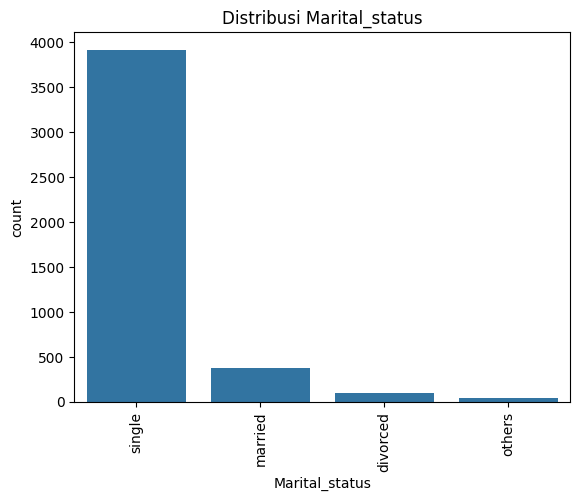


Kolom: Application_mode
Application_mode
General Admission Phases             2704
Mature and International Students     815
Transfers and Course Changes          449
Prior Higher Education Holders        387
Special Regional Quotas                54
Ordinance-based Admission              15
Name: count, dtype: int64


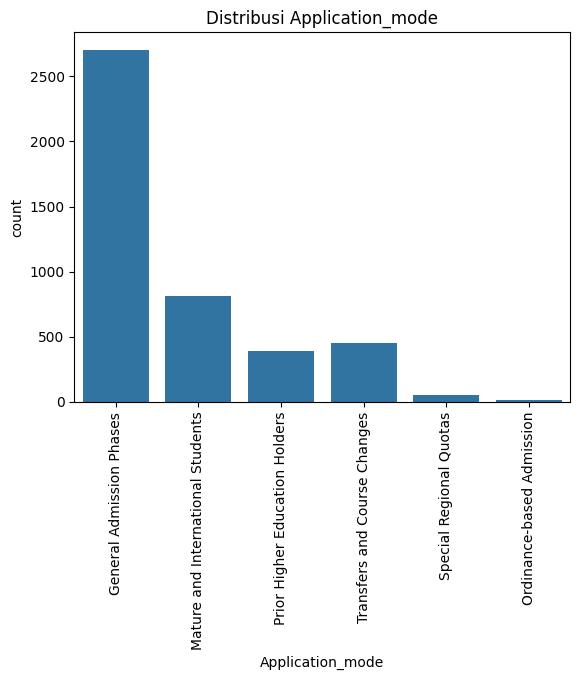


Kolom: Application_order
Application_order
High Preference      3573
Medium Preference     712
Low Preference        138
First Choice            1
Name: count, dtype: int64


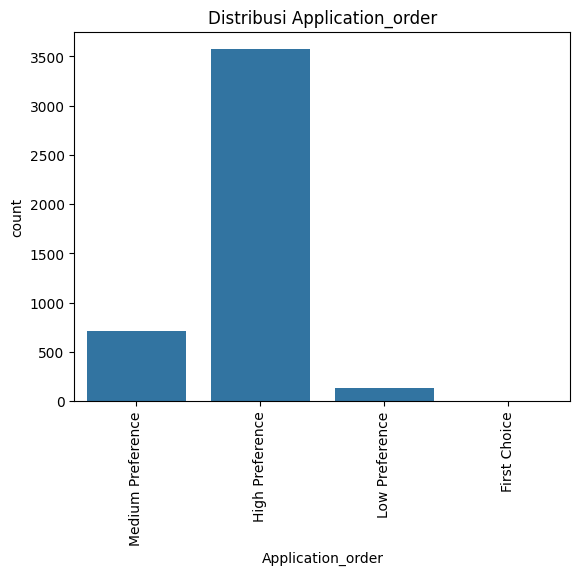


Kolom: Course
Course
Nursing                                 766
Management                              648
Social Service                          570
Veterinary Nursing                      337
Journalism and Communication            331
Advertising and Marketing Management    268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Agronomy                                210
Basic Education                         192
Informatics Engineering                 170
Equinculture                            141
Oral Hygiene                             86
Biofuel Production Technologies          12
Name: count, dtype: int64


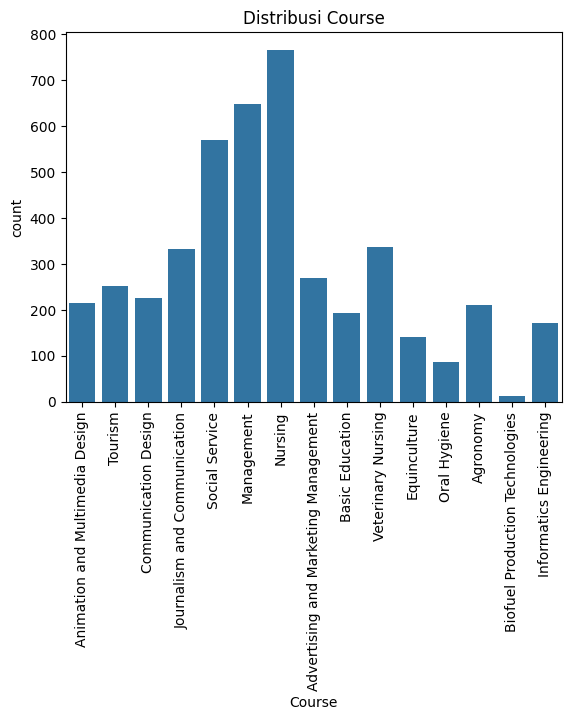


Kolom: schedule_attendance
schedule_attendance
evening    3941
daytime     483
Name: count, dtype: int64


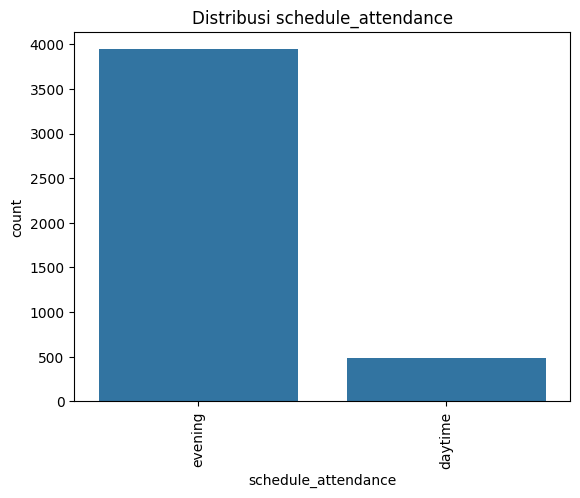


Kolom: Previous_qualification
Previous_qualification
High School Level        3949
Specialized Technical     255
Bachelor Level            189
Others                     16
Master and Doctorate       15
Name: count, dtype: int64


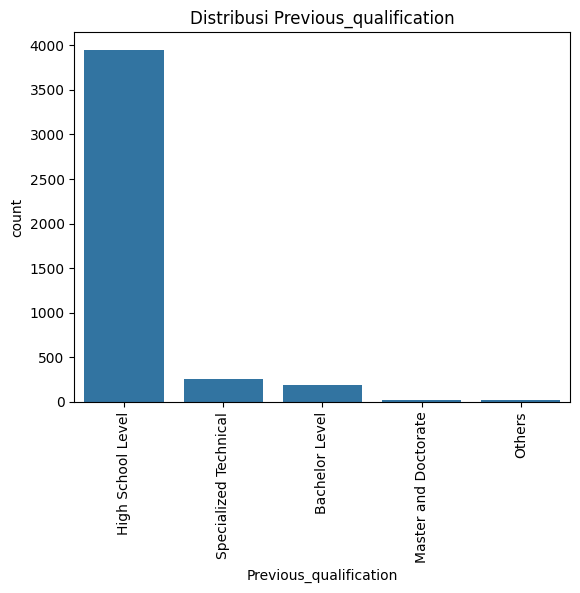


Kolom: Nationality
Nationality
Portuguese                   4314
Brazil                         38
Africa                         36
European (Non-Portuguese)      25
Eastern Europe/Asia             6
Latin America                   4
Other                           1
Name: count, dtype: int64


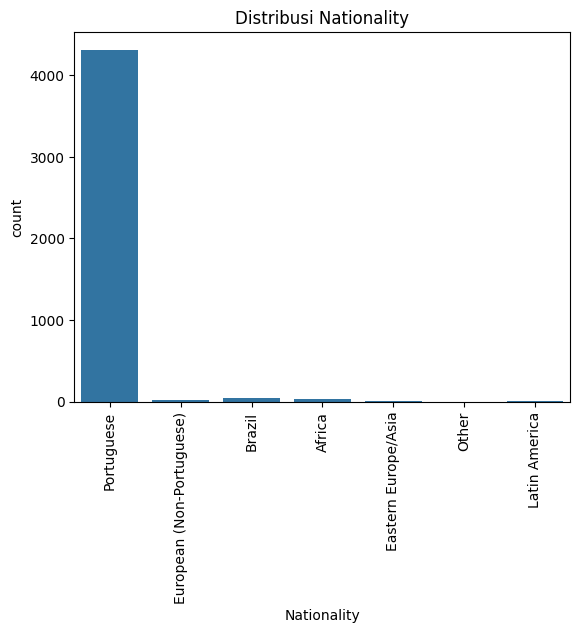


Kolom: Mothers_qualification
Mothers_qualification
Low Educated           1577
Medium Educated        1128
Medium-Low Educated     962
High Educated           623
Unknown                 134
Name: count, dtype: int64


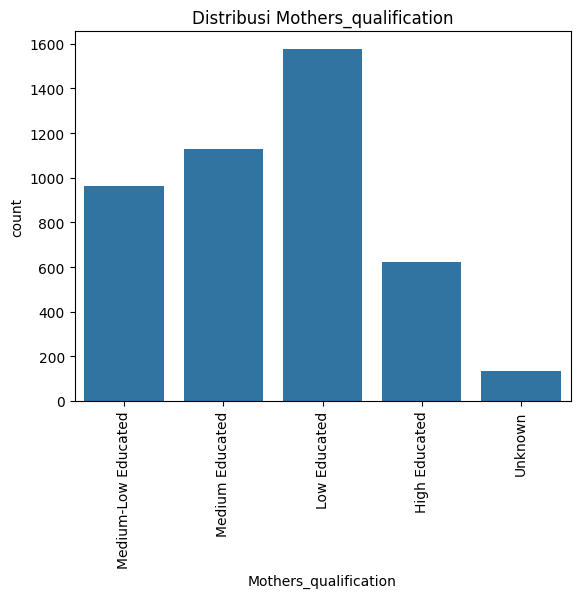


Kolom: Fathers_qualification
Fathers_qualification
Low Educated           1921
Medium-Low Educated     985
Medium Educated         966
High Educated           438
Unknown                 114
Name: count, dtype: int64


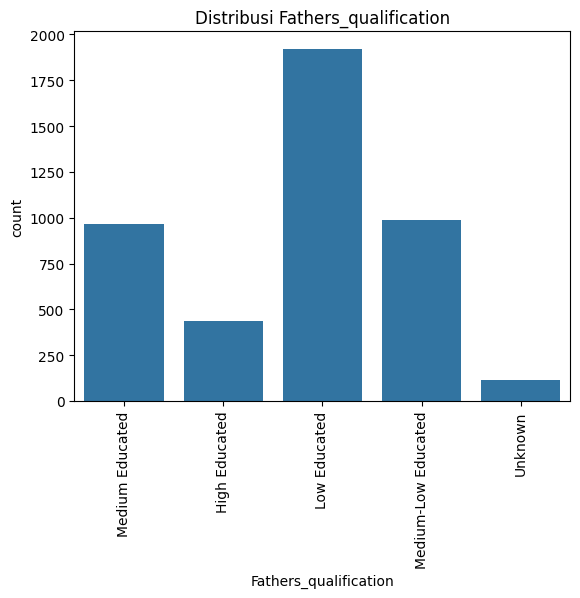


Kolom: Mothers_occupation
Mothers_occupation
Professional/Managerial      1623
Unskilled Labor              1618
Service/Sales                 537
Machine/Vehicle Operators     308
Student                       144
Agriculture                    96
Others                         87
Skilled Labor                   7
Military                        4
Name: count, dtype: int64


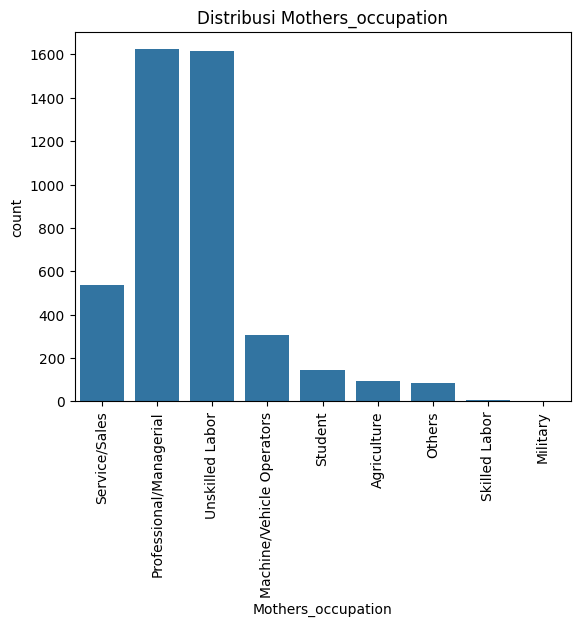


Kolom: Fathers_occupation
Fathers_occupation
Professional/Managerial      1127
Unskilled Labor              1027
Machine/Vehicle Operators     992
Service/Sales                 524
Military                      273
Agriculture                   254
Student                       128
Others                         84
Skilled Labor                  15
Name: count, dtype: int64


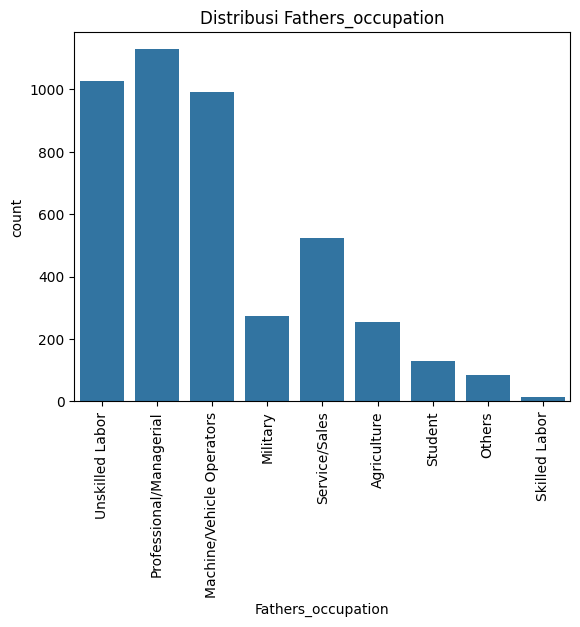


Kolom: Displaced
Displaced
yes    2426
no     1998
Name: count, dtype: int64


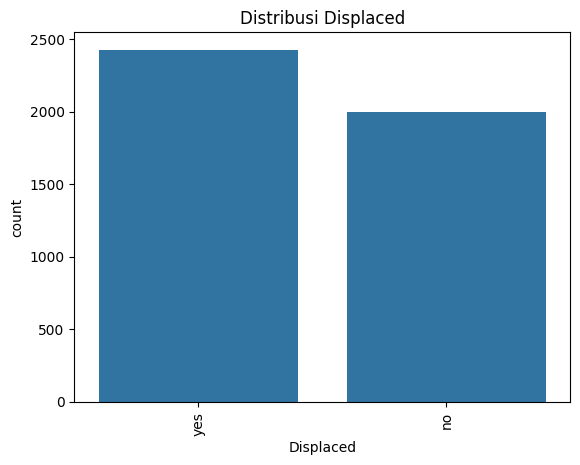


Kolom: Educational_special_needs
Educational_special_needs
no     4373
yes      51
Name: count, dtype: int64


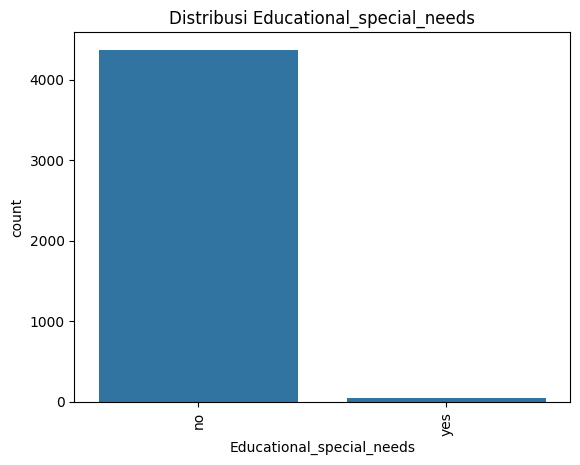


Kolom: Debtor
Debtor
no     3921
yes     503
Name: count, dtype: int64


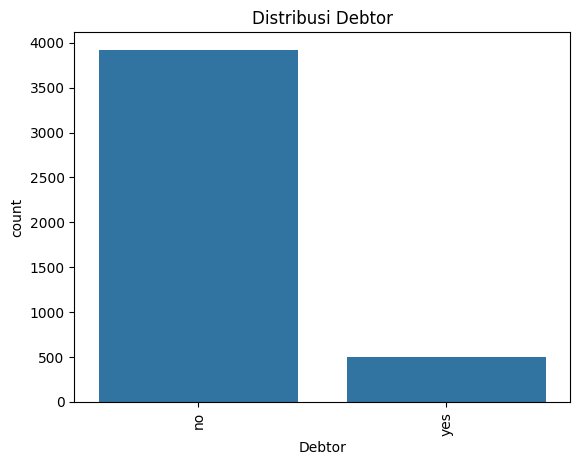


Kolom: Tuition_fees_up_to_date
Tuition_fees_up_to_date
yes    3896
no      528
Name: count, dtype: int64


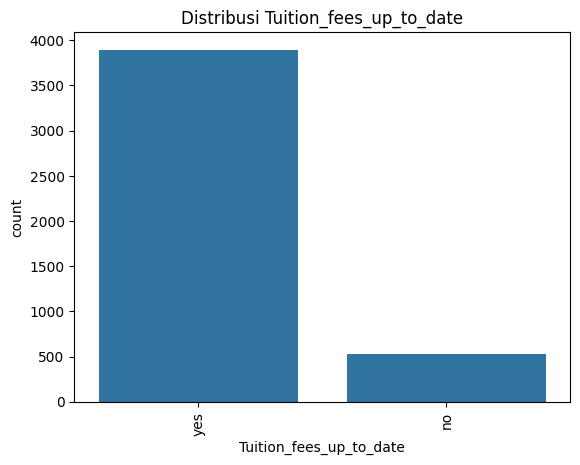


Kolom: Gender
Gender
female    2868
male      1556
Name: count, dtype: int64


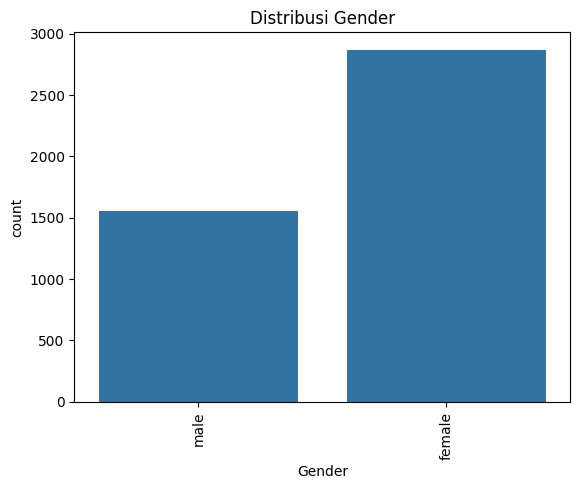


Kolom: Scholarship_holder
Scholarship_holder
no     3325
yes    1099
Name: count, dtype: int64


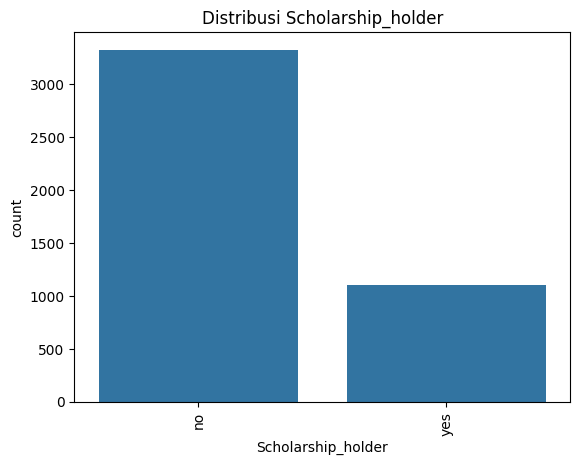


Kolom: International
International
no     4314
yes     110
Name: count, dtype: int64


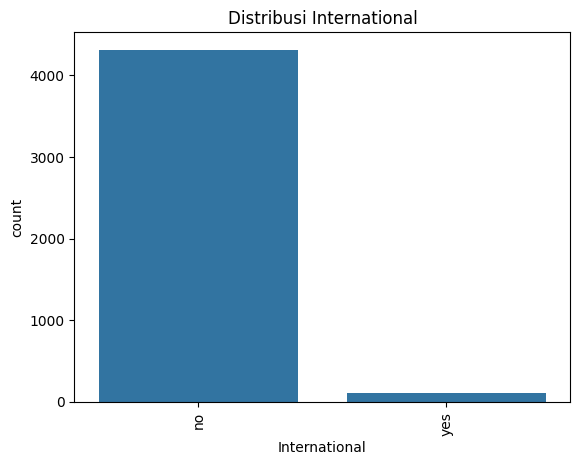


Kolom: Status
Status
Non Dropout    3003
Dropout        1421
Name: count, dtype: int64


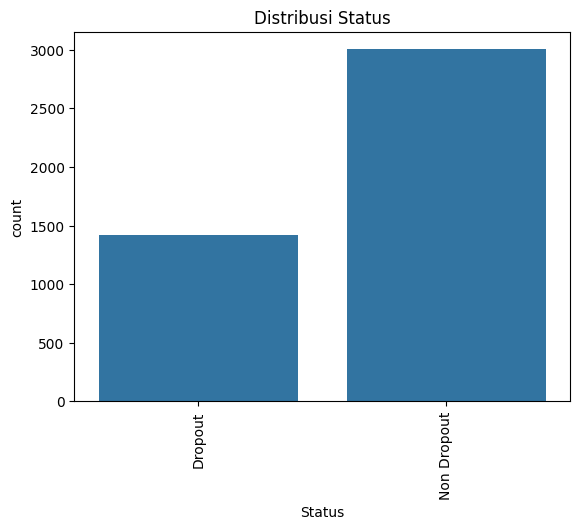

In [34]:
#Mengelompokan data berdasarkan tipe data object dan category
categorical_column = df.select_dtypes(include=['object','category'])

# Memvisualisasikan Distribusi Data pada data kategori/object
for col in categorical_column:
  print(f"\nKolom: {col}")
  print(df[col].value_counts())
  sns.countplot(data=df, x=col)
  plt.xticks(rotation=90)
  plt.title(f'Distribusi {col}')
  plt.show()


Kolom: Previous_qualification_grade
Previous_qualification_grade
133.1    491
130.0    375
140.0    336
120.0    278
150.0    162
        ... 
169.0      1
138.7      1
119.1      1
118.9      1
126.6      1
Name: count, Length: 101, dtype: int64


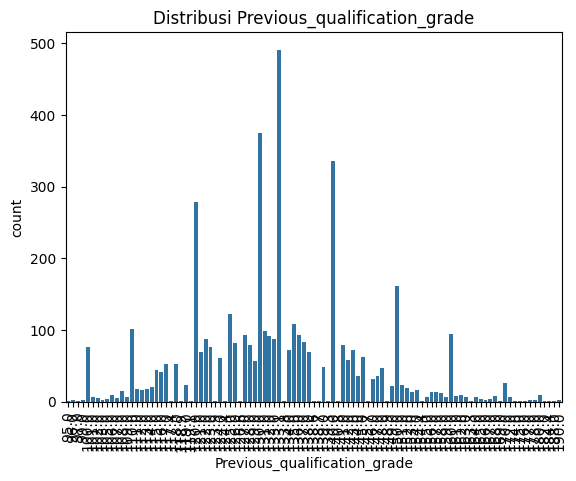


Kolom: Admission_grade
Admission_grade
130.0    162
140.0    153
120.0    145
100.0    116
150.0     81
        ... 
162.1      1
103.8      1
156.2      1
165.2      1
103.6      1
Name: count, Length: 620, dtype: int64


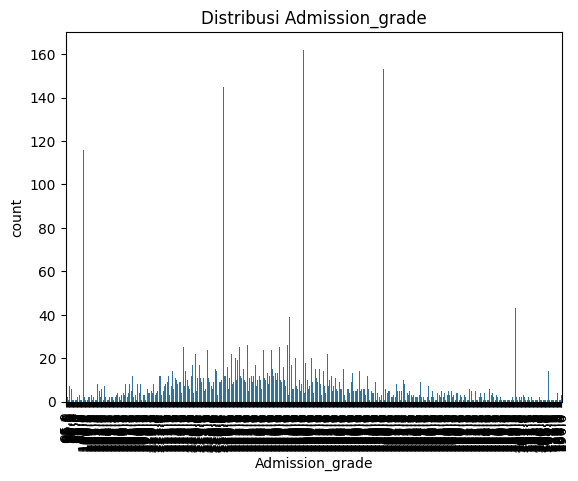


Kolom: Age_at_enrollment
Age_at_enrollment
18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
35      49
30      49
33      45
37      42
39      38
36      35
41      31
38      29
43      25
40      23
45      22
44      21
47      18
50      16
42      13
49      13
46      12
48      11
51       7
54       7
53       7
55       5
17       5
52       4
58       3
59       3
60       2
57       2
70       1
61       1
62       1
Name: count, dtype: int64


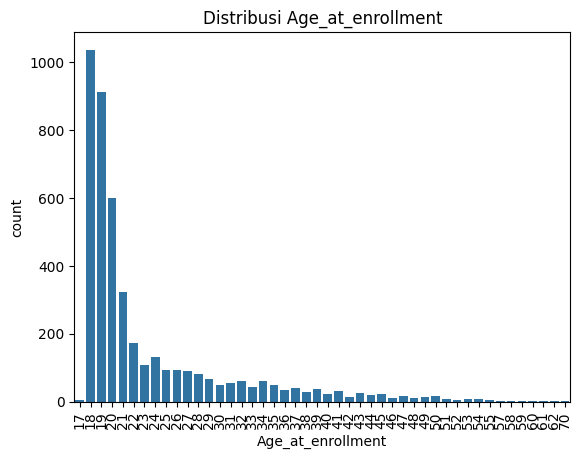


Kolom: Curricular_units_1st_sem_credited
Curricular_units_1st_sem_credited
0     3847
2       94
1       85
3       69
6       51
4       47
7       41
5       41
8       31
9       27
11      17
14      15
10      15
13      13
12      12
15       5
18       4
16       3
17       3
19       2
20       2
Name: count, dtype: int64


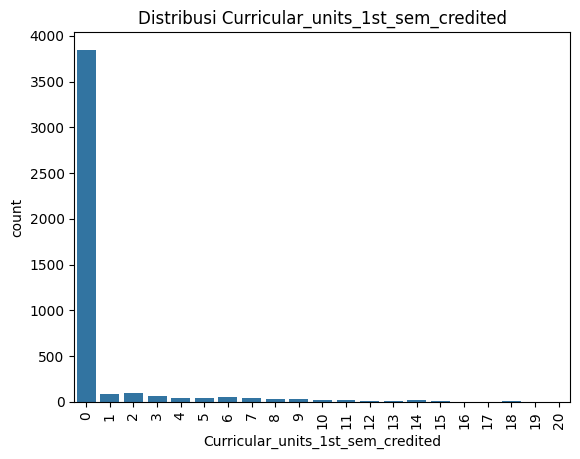


Kolom: Curricular_units_1st_sem_enrolled
Curricular_units_1st_sem_enrolled
6     1910
5     1010
7      656
8      296
0      180
12      66
10      52
11      45
9       36
15      25
14      22
4       21
13      20
18      19
17      16
16      13
3       10
2        9
1        7
21       6
19       2
23       2
26       1
Name: count, dtype: int64


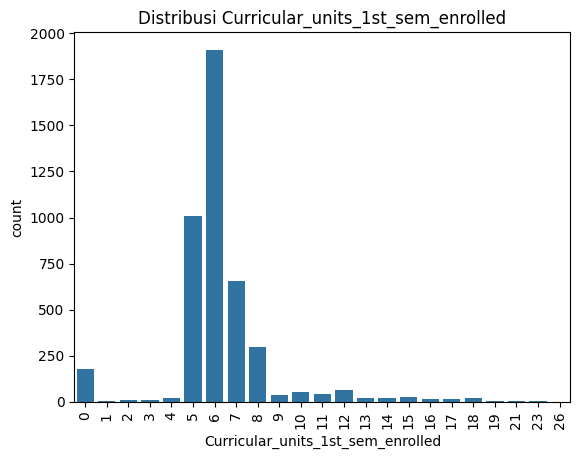


Kolom: Curricular_units_1st_sem_evaluations
Curricular_units_1st_sem_evaluations
8     791
7     703
6     598
9     402
0     349
10    340
11    239
12    223
5     220
13    140
14    105
15     70
16     47
17     33
18     30
19     23
4      19
21     17
20     12
22     10
23      9
2       8
1       6
3       6
24      6
26      4
25      3
29      2
45      2
27      2
32      1
36      1
31      1
28      1
33      1
Name: count, dtype: int64


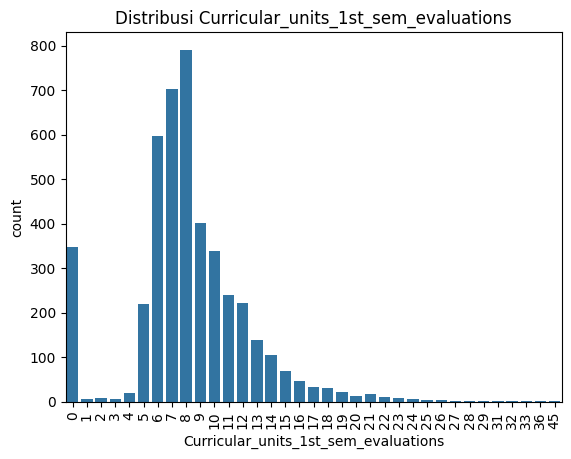


Kolom: Curricular_units_1st_sem_approved
Curricular_units_1st_sem_approved
6     1171
5      723
0      718
7      471
4      433
3      269
2      160
1      127
8      108
11      49
12      44
9       40
13      26
10      24
18      15
14      14
17      10
15       7
16       5
21       4
20       3
19       2
26       1
Name: count, dtype: int64


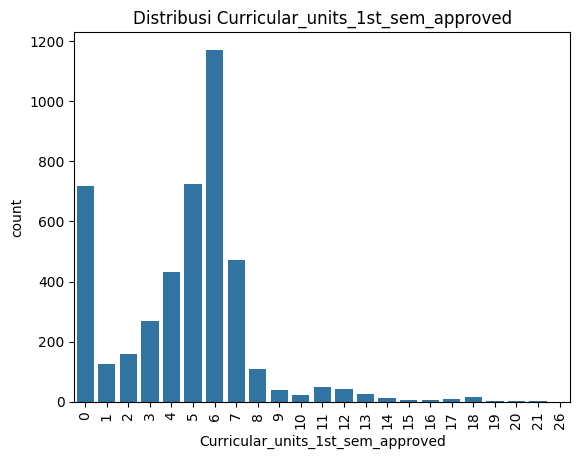


Kolom: Curricular_units_1st_sem_grade
Curricular_units_1st_sem_grade
0.00     718
12.00    206
13.00    147
11.00    138
11.50     89
        ... 
10.93      1
14.64      1
14.18      1
10.90      1
13.87      1
Name: count, Length: 435, dtype: int64


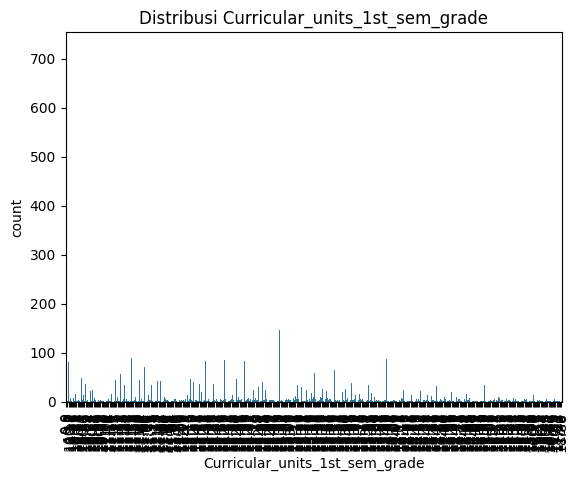


Kolom: Curricular_units_1st_sem_without_evaluations
Curricular_units_1st_sem_without_evaluations
0     4130
1      153
2       79
3       23
4       15
6        6
7        6
5        5
8        4
12       2
10       1
Name: count, dtype: int64


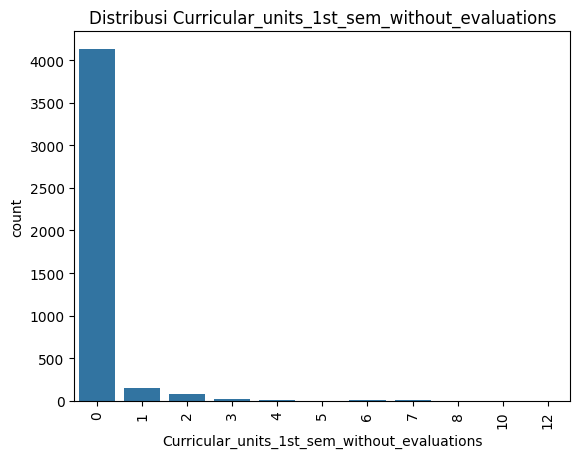


Kolom: Curricular_units_2nd_sem_credited
Curricular_units_2nd_sem_credited
0     3894
1      107
2       92
4       78
5       68
3       49
6       26
11      20
7       16
9       15
12      14
10      13
8       12
13       9
14       4
15       2
16       2
18       2
19       1
Name: count, dtype: int64


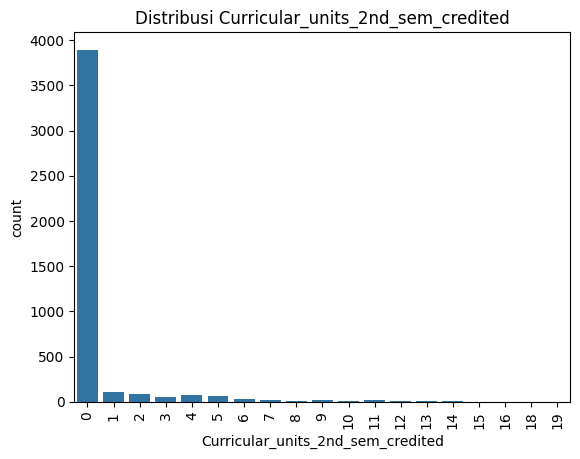


Kolom: Curricular_units_2nd_sem_enrolled
Curricular_units_2nd_sem_enrolled
6     1913
5     1054
8      661
7      304
0      180
11      60
9       50
10      48
12      44
13      37
14      22
4       17
17      12
2        5
3        3
19       3
1        3
15       2
23       2
18       2
16       1
21       1
Name: count, dtype: int64


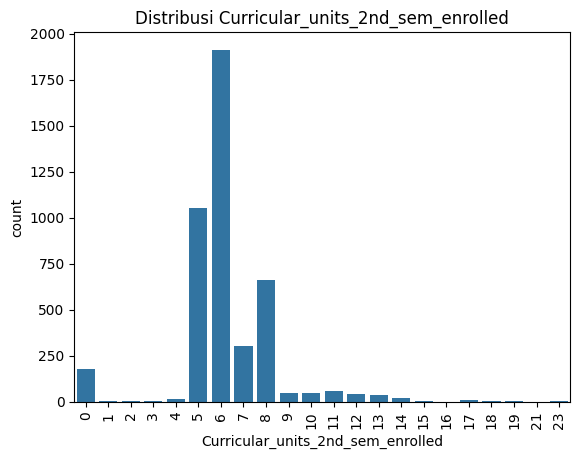


Kolom: Curricular_units_2nd_sem_evaluations
Curricular_units_2nd_sem_evaluations
8     792
6     614
7     563
9     456
0     401
10    355
5     288
11    255
12    226
13    126
14     98
15     73
16     49
17     25
18     22
19     19
21     10
4      10
22     10
20      8
23      4
2       4
26      3
1       3
24      3
3       2
27      2
28      1
25      1
33      1
Name: count, dtype: int64


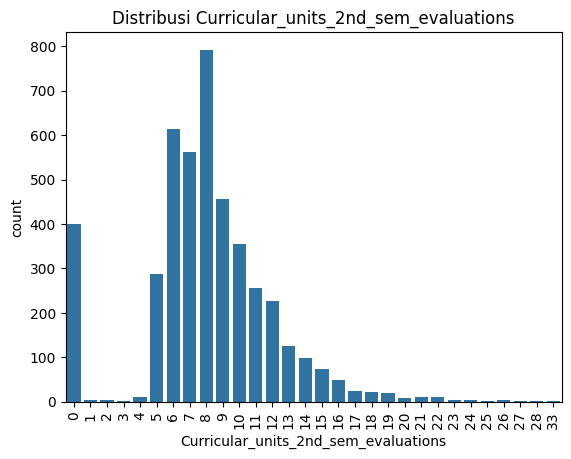


Kolom: Curricular_units_2nd_sem_approved
Curricular_units_2nd_sem_approved
6     965
0     870
5     726
4     414
7     331
8     321
3     285
2     198
1     114
11     48
10     38
9      36
12     34
13     21
17      8
14      6
19      3
20      2
16      2
18      2
Name: count, dtype: int64


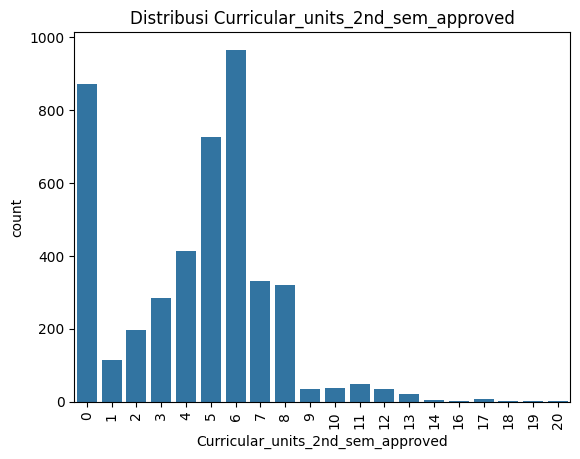


Kolom: Curricular_units_2nd_sem_grade
Curricular_units_2nd_sem_grade
0.00     870
12.00    171
11.00    165
13.00    150
11.50     86
        ... 
10.38      1
14.24      1
14.92      1
11.32      1
11.26      1
Name: count, Length: 441, dtype: int64


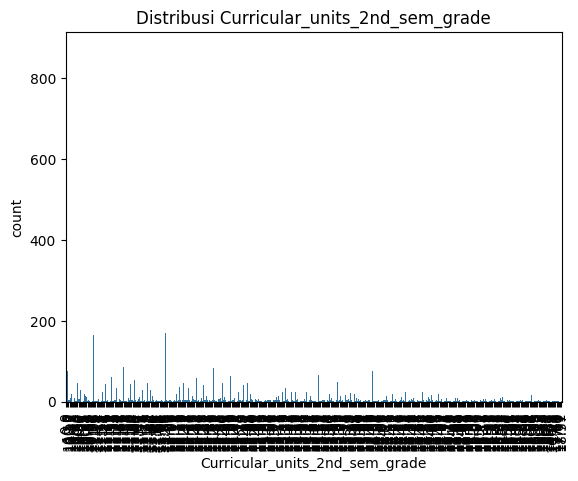


Kolom: Curricular_units_2nd_sem_without_evaluations
Curricular_units_2nd_sem_without_evaluations
0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: count, dtype: int64


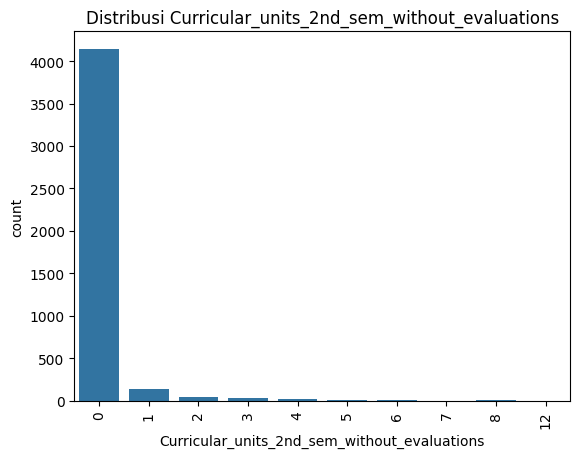


Kolom: Unemployment_rate
Unemployment_rate
7.6     571
9.4     533
10.8    525
12.4    445
12.7    419
11.1    414
15.5    397
13.9    390
8.9     368
16.2    362
Name: count, dtype: int64


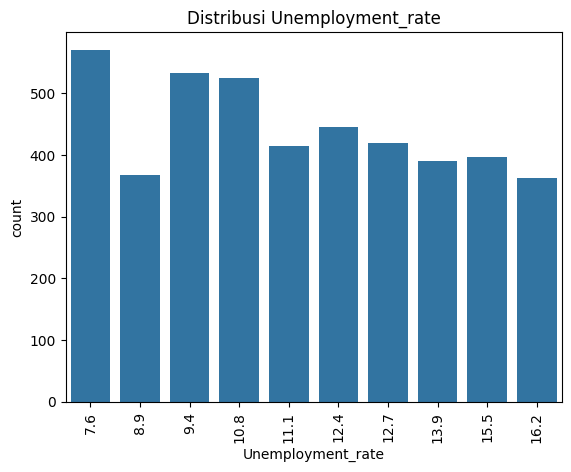


Kolom: Inflation_rate
Inflation_rate
 1.4    893
 2.6    571
-0.8    533
 0.5    445
 3.7    419
 0.6    414
 2.8    397
-0.3    390
 0.3    362
Name: count, dtype: int64


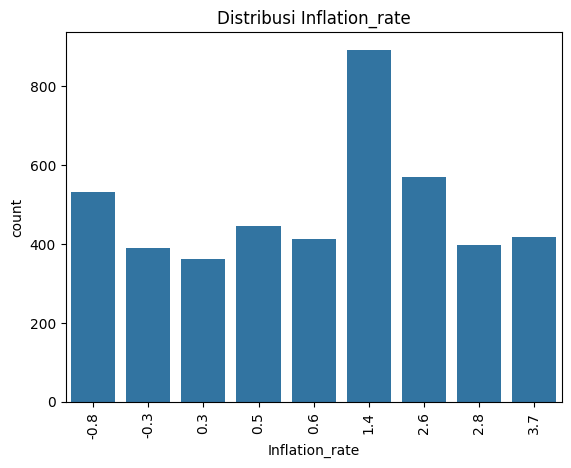


Kolom: GDP
GDP
 0.32    571
-3.12    533
 1.74    525
 1.79    445
-1.70    419
 2.02    414
-4.06    397
 0.79    390
 3.51    368
-0.92    362
Name: count, dtype: int64


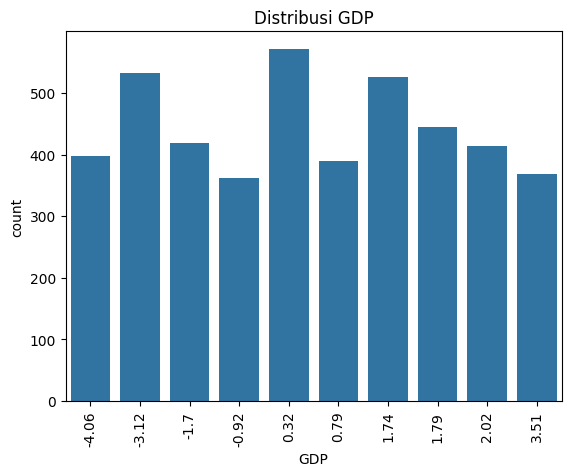

In [35]:
#Mengelompokan data berdasarkan tipe data int64 dan float (number)
numerical_column = df.select_dtypes(include=['float64','int64'])

# Memvisualisasikan Distribusi Data pada data int64 dan float (number)
for col in numerical_column:
  print(f"\nKolom: {col}")
  print(df[col].value_counts())
  sns.countplot(data=df, x=col)
  plt.xticks(rotation=90)
  plt.title(f'Distribusi {col}')
  plt.show()

In [106]:
# Mencari nilai mean, median, std, min dan max pada data numerik
numerical_stats = numerical_column.describe().T[['mean', '50%', 'std', 'min', 'max']]
print(numerical_stats)

                                                    mean     50%        std  \
Previous_qualification_grade                  132.613314  133.10  13.188332   
Admission_grade                               126.978119  126.10  14.482001   
Age_at_enrollment                              23.265145   20.00   7.587816   
Curricular_units_1st_sem_credited               0.709991    0.00   2.360507   
Curricular_units_1st_sem_enrolled               6.270570    6.00   2.480178   
Curricular_units_1st_sem_evaluations            8.299051    8.00   4.179106   
Curricular_units_1st_sem_approved               4.706600    5.00   3.094238   
Curricular_units_1st_sem_grade                 10.640848   12.29   4.843666   
Curricular_units_1st_sem_without_evaluations    0.137658    0.00   0.690880   
Curricular_units_2nd_sem_credited               0.541817    0.00   1.918546   
Curricular_units_2nd_sem_enrolled               6.232143    6.00   2.195951   
Curricular_units_2nd_sem_evaluations            8.06

#### **Bivariate Analysis**

**Insight**

Hasil dari bivariate analysis pada proses EDA ini kita dapat lihat sebuah pattern atau pola yang unggul dari masing masing kolom.
- Mahasiswa terbanyak yang di dropout terdapat pada jurusan `Management` dan `Social Service` sedangkan yang paling sedikit yakni pada jurusan `Biofuel Production Technologies`.
- Mahasiswa yang akan/berpotensi di dropout cenderung mendaftar pada rata rata 26 tahun.
- Mahasiswa yang di dropout cenderung berstatus pernikahan `Single`

In [37]:
# Menghitung rata rata usia pendaftaran per-status
df.groupby('Status')['Age_at_enrollment'].mean()

Status
Dropout        26.068966
Non Dropout    21.938395
Name: Age_at_enrollment, dtype: float64

<Axes: xlabel='Marital_status', ylabel='count'>

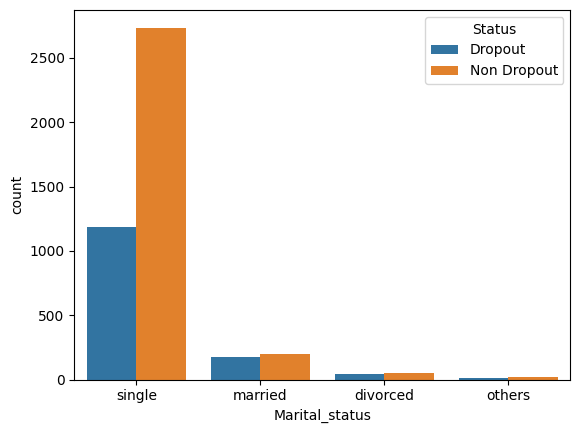

In [38]:
#Memvisualisasikan jumlah siswa berdasarkan status per Marital Status 
sns.countplot(x='Marital_status', hue='Status', data=df)

In [39]:
# Menghitung Droput berdasarkan marial Status
dropout_by_marital = df[df['Status'] == 'Dropout'].groupby('Marital_status')['Status'].count()
print(dropout_by_marital)


Marital_status
divorced      42
married      179
others        16
single      1184
Name: Status, dtype: int64


In [40]:
# Menghitung Droput berdasarkan marial Status
dropout_by_marital = df[df['Status'] == 'Non Dropout'].groupby('Marital_status')['Status'].count()
print(dropout_by_marital)


Marital_status
divorced      49
married      200
others        19
single      2735
Name: Status, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

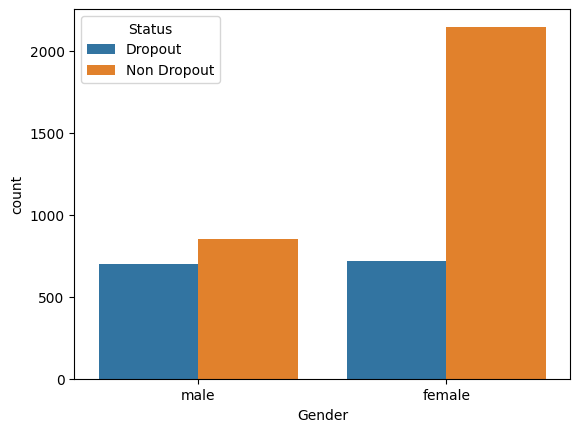

In [41]:
# Menghitung jumlah status berdasarkan gender
sns.countplot(x='Gender', hue='Status', data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Nursing'),
  Text(1, 0, 'Management'),
  Text(2, 0, 'Social Service'),
  Text(3, 0, 'Veterinary Nursing'),
  Text(4, 0, 'Journalism and Communication'),
  Text(5, 0, 'Advertising and Marketing Management'),
  Text(6, 0, 'Tourism'),
  Text(7, 0, 'Communication Design'),
  Text(8, 0, 'Animation and Multimedia Design'),
  Text(9, 0, 'Agronomy'),
  Text(10, 0, 'Basic Education'),
  Text(11, 0, 'Informatics Engineering'),
  Text(12, 0, 'Equinculture'),
  Text(13, 0, 'Oral Hygiene'),
  Text(14, 0, 'Biofuel Production Technologies')])

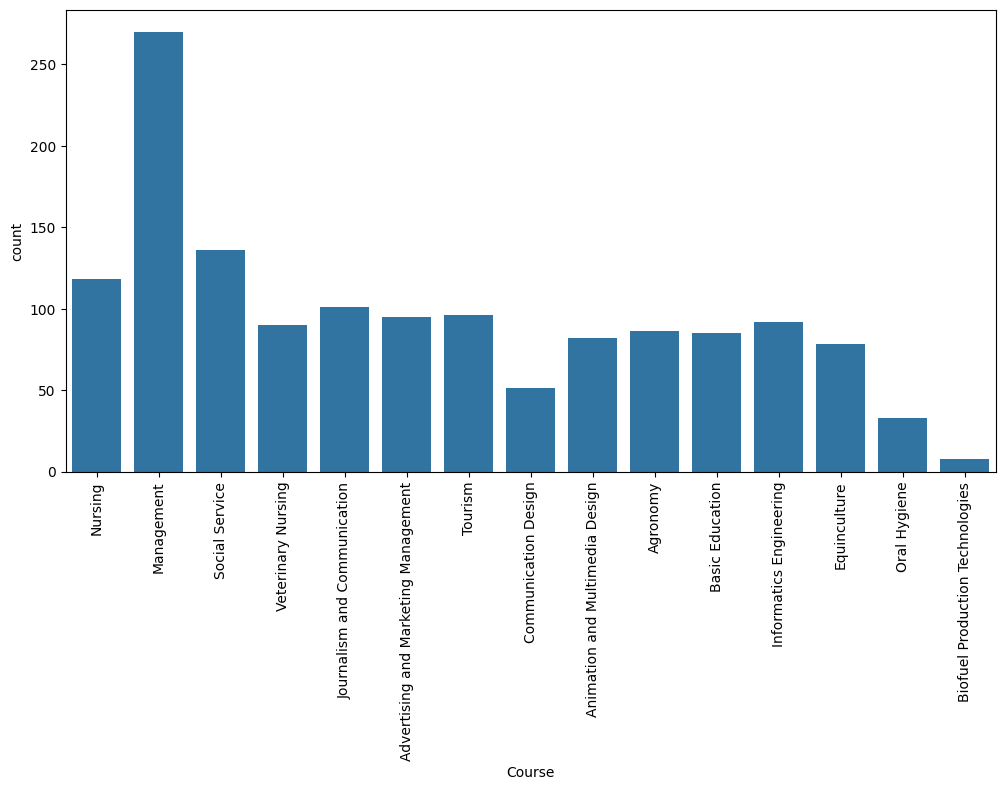

In [42]:
# memvisualisasikan course apa yang menyebabkan dropout terbanyak
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Status'] == 'Dropout'], x='Course', order=df['Course'].value_counts().index)
plt.xticks(rotation=90)

#### **Multivariate Analysis**

**Insight**

Berdasarkan multivariate analysis, kita dapat mendapatkan insight variabel yang saling keterkaitan yakni:

- Nilai korelasi antara Previous_qualification_grade dengan Admission_grade sebesar 58% dan adapun yang paling keterakitan itu antara variabel nilai dari sks, indeks prestasi maupun hasil evaluasi dari sks yang diambil.
- Laki-laki yang tidak mendapatkan beasiswa memiliki kecenderungan (proporsi) dropout yang paling tinggi dibandingkan kategori gender dan status beasiswa lainnya
- Di beberapa jurusan seperti Tourism, Basic Education, dan Informatics Engineering, mahasiswa yang dropout cenderung memiliki "Inflation_rate" yang lebih tinggi dibandingkan dengan yang non dropout. Ini mungkin mengindikasikan bahwa tekanan finansial (jika "Inflation_rate" ini merepresentasikan beban finansial, misalnya biaya hidup/kuliah yang terus meningkat) bisa menjadi faktor pendorong dropout di jurusan-jurusan ini.

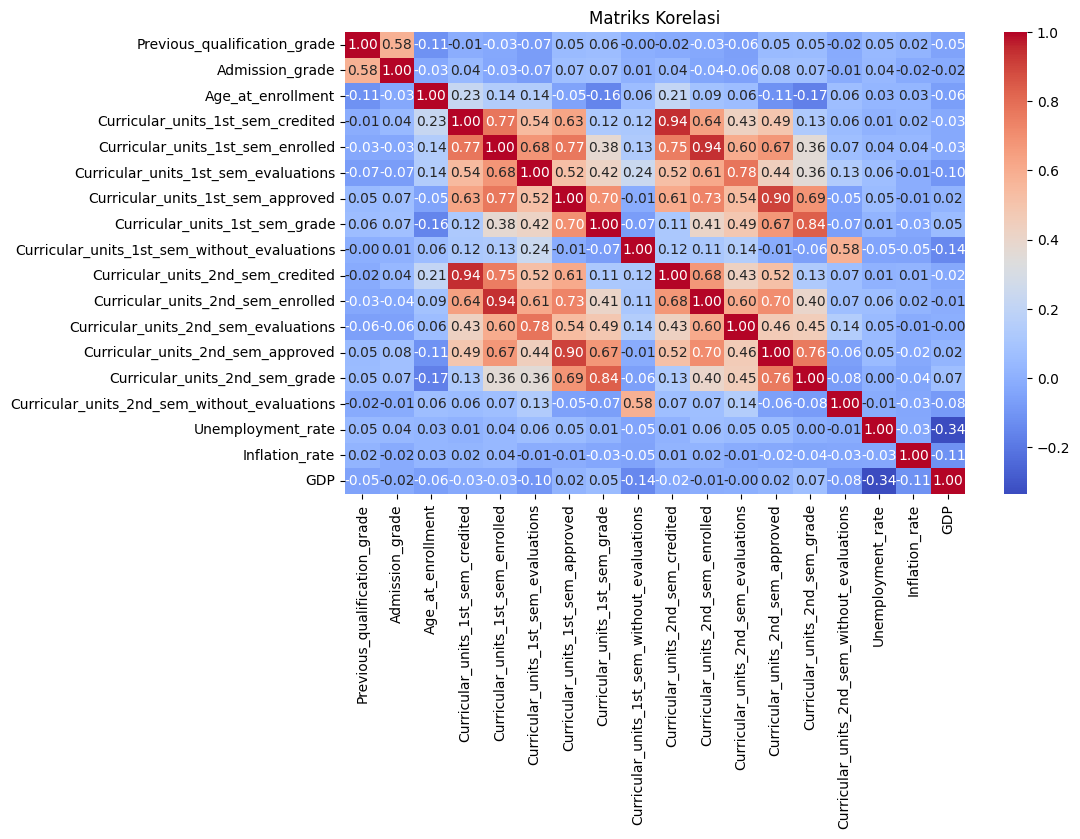

In [43]:
# Menampilkan visualisasi Martriks Korelasi pada numerical_column
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_column.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

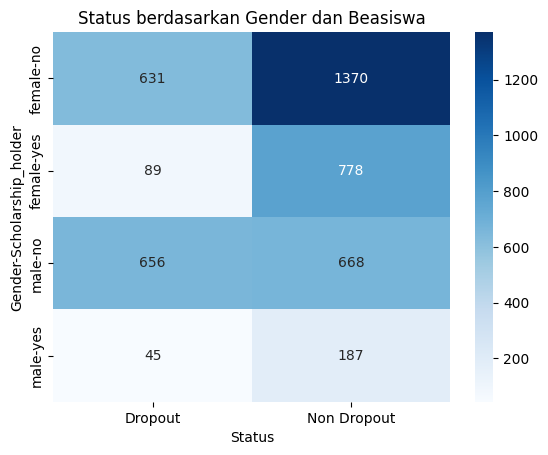

In [44]:
# Menghitung Status prestasi berdasarkan Gender dan Beasiswa
ct = pd.crosstab([df['Gender'], df['Scholarship_holder']], df['Status'])
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title('Status berdasarkan Gender dan Beasiswa')
plt.show()

Text(0.5, 1.0, 'Previous Qualification Grade by Course and Status')

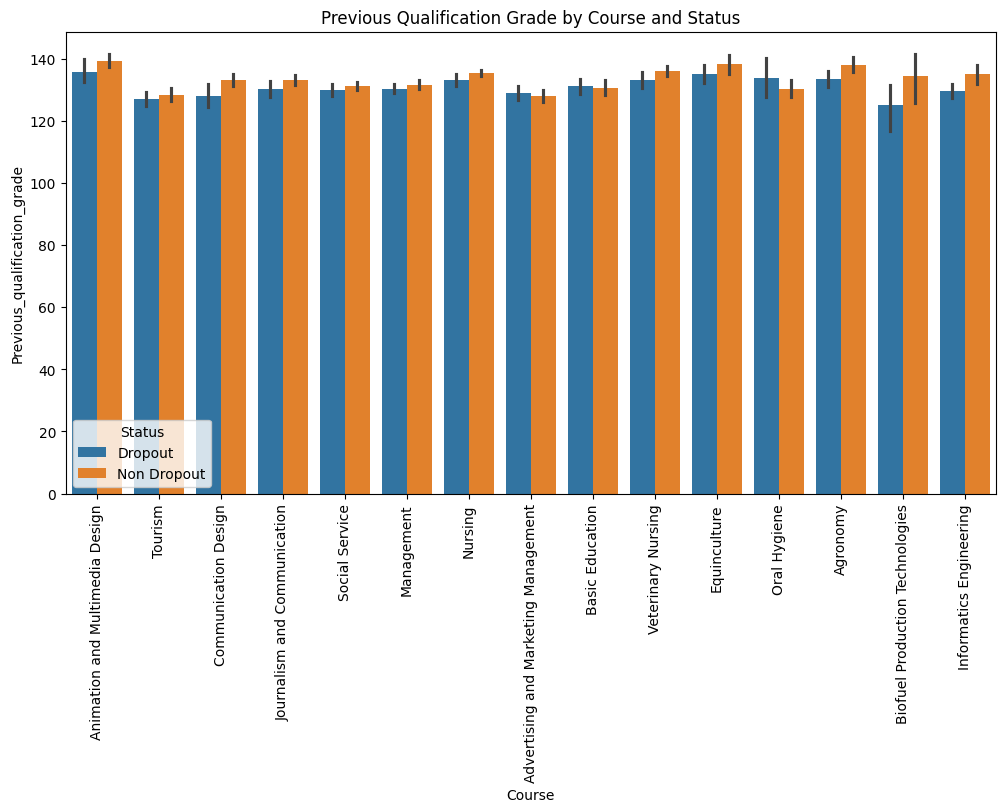

In [86]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Course',y='Previous_qualification_grade', hue='Status')
plt.xticks(rotation=90)
plt.title('Previous Qualification Grade by Course and Status')

Text(0.5, 1.0, 'GDP by Fathers Occupation and Status')

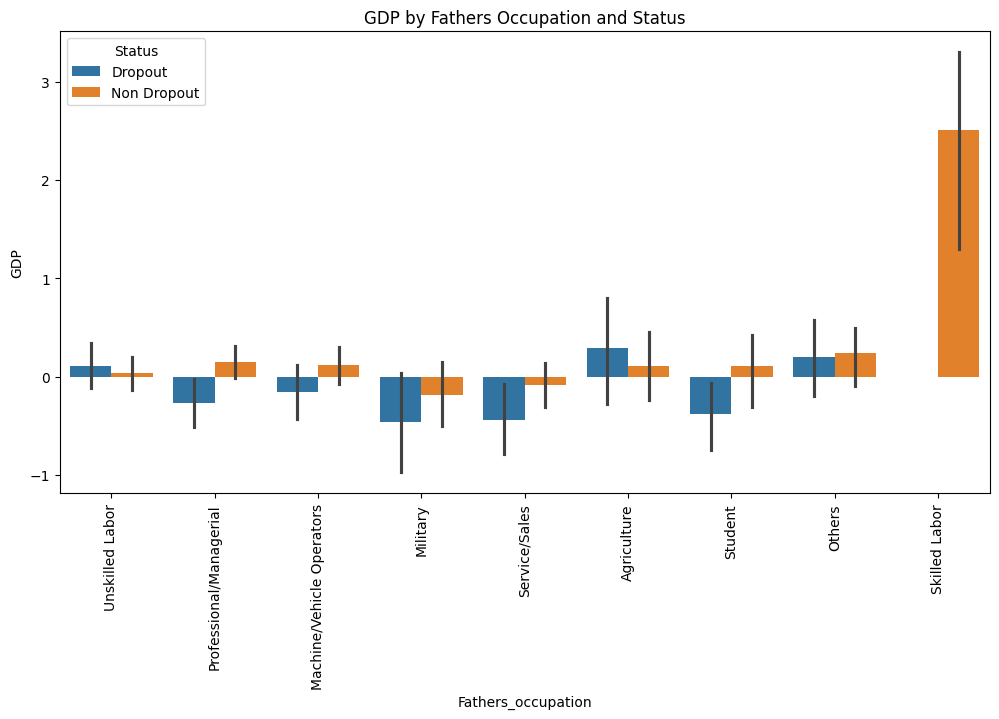

In [90]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Fathers_occupation',y='GDP', hue='Status')
plt.xticks(rotation=90)
plt.title('GDP by Fathers Occupation and Status')

Text(0.5, 1.0, 'Inflation_rate by Course and Status')

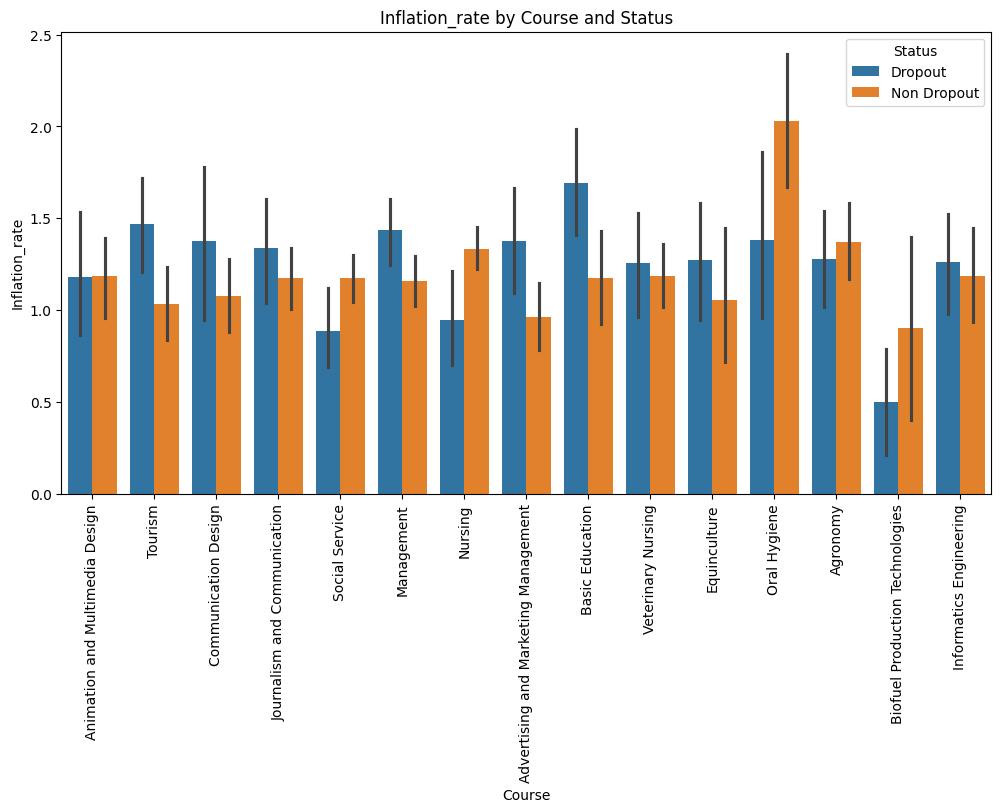

In [103]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Course',y='Inflation_rate', hue='Status')
plt.xticks(rotation=90)
plt.title('Inflation_rate by Course and Status')

Text(0.5, 1.0, 'Gender by Enrolled and Status')

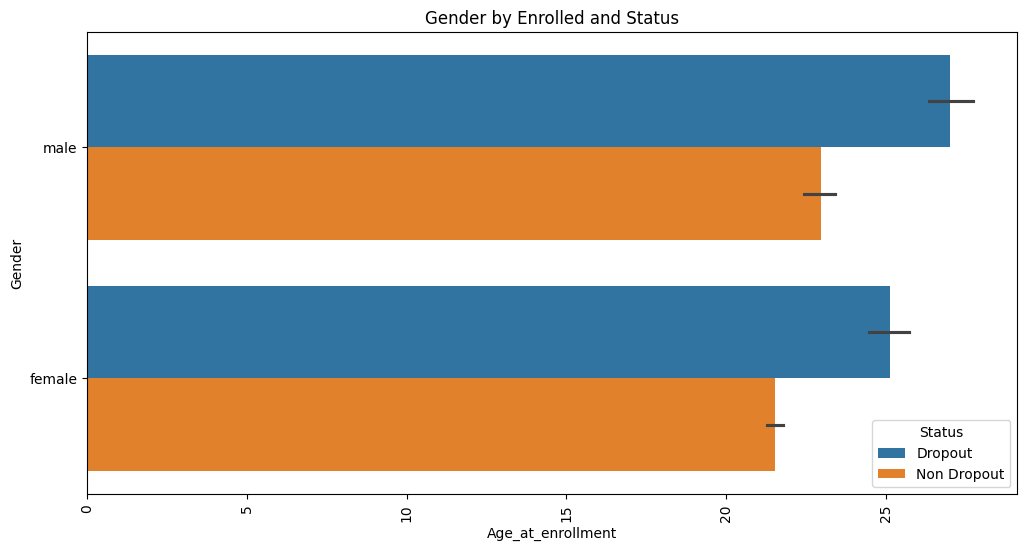

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Age_at_enrollment',y='Gender', hue='Status')
plt.xticks(rotation=90)
plt.title('Gender by Enrolled and Status')

### **Data Proprocessing**

**Objectives**:

Preparing normalized data so that it is ready to be used to train the model.

**Steps Performed:**

- ✅ Split dataset into `training set` and `testing set` to evaluate model generalization.

- ✅ Encode categorical variables using `LabelEncoder` to convert them into numerical format.

- ✅ Standardize numerical features using `StandardScaler` to ensure they have a mean of 0 and standard deviation of 1.

In [46]:
x = df.drop(['Status'], axis=1)

y = df['Status']

In [47]:
x_numerical = x.select_dtypes(include=['float64', 'int64'])
x_categorical = x.select_dtypes(include=['object', 'category'])


In [48]:
# Normalization data numerical_column with Standar Scaler
scaler = StandardScaler()
x_num_scaled = pd.DataFrame(scaler.fit_transform(x_numerical), columns=x_numerical.columns)

In [49]:
# Encode categorical data using label encoder
label_encoder_dict = {}
x_categorical_encoded = x_categorical.copy()

for col in x_categorical.columns:
    le = LabelEncoder()
    x_categorical_encoded[col] = le.fit_transform(x_categorical[col])
    label_encoder_dict[col] = le

In [50]:
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

In [51]:
x_fix = pd.concat([x_categorical_encoded,x_num_scaled], axis=1)
x_fix.head()

,Marital_status,Application_mode,Application_order,Course,schedule_attendance,Previous_qualification,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
0,3,0,3,2,1,1,6,3,2,5,8,1,0,0,1,1,0,0,-0.804841,0.022229,-0.430363,-0.300813,-2.528560,-1.986068,-1.521257,-2.197107,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963484,-0.199441,-0.287638,0.124386,0.765761
1,3,1,1,13,1,1,6,2,0,4,4,1,0,0,0,1,0,0,2.076819,1.071926,-0.562168,-0.300813,-0.109105,-0.550192,0.418050,0.693593,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.660201,-0.199441,0.876222,-1.105222,0.347199
2,3,0,3,5,1,1,6,1,1,8,8,1,0,0,0,1,0,0,-0.804841,-0.150419,-0.562168,-0.300813,-0.109105,-1.986068,-1.521257,-2.197107,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963484,-0.199441,-0.287638,0.124386,0.765761
3,3,0,1,8,1,1,6,1,1,5,4,1,0,0,1,0,0,0,-0.804841,-0.509526,-0.430363,-0.300813,-0.109105,-0.071567,0.418050,0.575900,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511
4,1,1,1,12,0,1,6,1,1,8,8,0,0,0,1,0,0,0,-2.473171,1.002867,2.864765,-0.300813,-0.109105,0.167746,0.094832,0.348774,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199


**Spliting Data into data train dan data test**

In [52]:
#splitting data into a data train and data test
x_train, x_test, y_train, y_test = train_test_split(x_fix, y_encoded, test_size=0.2, random_state=21)

In [53]:
x_train.shape

(3539, 36)

In [54]:
x_train.sample(4)

,Marital_status,Application_mode,Application_order,Course,schedule_attendance,Previous_qualification,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
1118,3,1,1,11,1,1,6,1,1,8,8,1,0,0,1,0,0,0,-0.198176,2.211400,0.228663,-0.300813,0.294137,0.646371,0.741268,0.251729,-0.199273,-0.282442,0.805144,3.277186,0.187165,0.282099,-0.199441,0.313064,-0.526582,0.787790
3451,3,1,1,10,1,1,6,3,3,5,0,0,0,1,1,0,0,0,0.036907,-0.385220,0.624078,-0.300813,0.294137,0.885684,-0.228386,0.565576,-0.199273,-0.282442,0.349709,-0.269358,0.187165,0.627573,-0.199441,0.876222,-1.105222,0.347199
2413,1,1,1,12,0,1,6,4,4,7,7,1,0,0,1,0,0,0,-2.473171,-1.863083,2.337545,-0.300813,-0.109105,0.167746,0.094832,0.239340,-0.199273,0.238845,-0.105726,0.490616,-0.476312,0.084411,1.127366,-1.489043,0.992345,0.140122
3846,3,5,1,8,1,1,6,1,1,8,5,1,0,0,0,1,0,0,-1.411507,-1.352046,0.360468,-0.300813,-0.109105,0.885684,-0.551604,0.280636,-0.199273,-0.282442,-0.105726,1.757239,-1.471527,-1.963484,-0.199441,-0.813253,-1.466871,-1.375511


In [55]:
print(x_train.dtypes)

Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Course                                            int64
schedule_attendance                               int64
Previous_qualification                            int64
Nationality                                       int64
Mothers_qualification                             int64
Fathers_qualification                             int64
Mothers_occupation                                int64
Fathers_occupation                                int64
Displaced                                         int64
Educational_special_needs                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                            int64
Scholarship_holder                                int64
International                                   

In [56]:
x_test.shape

(885, 36)

## **Modeling - First Iteration**

**Objectives**

- ✅  **Algorithm Used**
   In this classification task, we experimented with three different algorithms:

   - `LogisticRegression`
   - `SupportVectorMachine`
   - `XGBoostClassifier`

- ✅  **Features Used**

   The model was built using **36 predictor variables**, with `Status` as the **target variable** for classification.

- ✅  **Initial Metrics Result**

   Training accuracy results for each model:
   - **Logistic Regression**: 87.6% (`0.876`)
   - **Support Vector Machine**: 86.6% (`0.866`)
   - **XGBoost Classifier**: 99.9% (`0.999`)

In [57]:
def models(x_train,y_train):
  print('x_train type:', type(x_train), 'shape:', x_train.shape)
  print('y_train type:', type(y_train), 'shape:', y_train.shape)

  loreg=LogisticRegression()
  loreg.fit(x_train,y_train)


  svc=SVC()
  svc.fit(x_train,y_train)

  xg = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
  xg.fit(x_train, y_train)

  print('[0] Logistic Regression Training Accuracy:', loreg.score(x_train, y_train))
  print('[1] XGBClassifier Machine Training Accuracy:', xg.score(x_train, y_train))
  print('[2] Support Vector Machine Training Accuracy:', svc.score(x_train, y_train))

  return  {
        'Logistic Regression': loreg,
        'XGBClassifier': xg,
        'Support Vector Machine': svc
    }

In [58]:
#Menjalankan fit model dengan data train
model = models(x_train,y_train)

x_train type: <class 'pandas.core.frame.DataFrame'> shape: (3539, 36)
y_train type: <class 'numpy.ndarray'> shape: (3539,)


c:\Users\adity\.virtualenvs\Submission-final-project-xp2hwIn1\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\adity\.virtualenvs\Submission-final-project-xp2hwIn1\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:23:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0] Logistic Regression Training Accuracy: 0.8768013563153433
[1] XGBClassifier Machine Training Accuracy: 0.9997174343034756
[2] Support Vector Machine Training Accuracy: 0.8660638598474145


In [59]:
first_iter_model = XGBClassifier()
first_iter_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## **Evaluation & Insights - First Iteration**

**Result Model** :

Accuracy & Confusion Matrix :

- ✅ Model: Logistic Regression
    Accuracy: 87%

- ✅ Model: XGBoost Classifier
Accuracy: 86%

- ✅ Model: Support Vector Machine
Accuracy: 85%



In [60]:
# Evaluation model performance

for name, mdl in model.items():
    y_pred = mdl.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print("***************")
    print("***************")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Confusion Matrix:
[[210  77]
 [ 35 563]]
Accuracy: 0.8734
Classification Report:
***************
***************
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       287
           1       0.88      0.94      0.91       598

    accuracy                           0.87       885
   macro avg       0.87      0.84      0.85       885
weighted avg       0.87      0.87      0.87       885


Model: XGBClassifier
Confusion Matrix:
[[206  81]
 [ 41 557]]
Accuracy: 0.8621
Classification Report:
***************
***************
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       287
           1       0.87      0.93      0.90       598

    accuracy                           0.86       885
   macro avg       0.85      0.82      0.84       885
weighted avg       0.86      0.86      0.86       885


Model: Support Vector Machine
Confusion Matrix:
[[169 118]
 [ 17 581]

In [61]:
# Print accuracy score model in first iteration
accuracy = first_iter_model.score(x_test, y_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.8621468926553673


**Feature Importance from XGBoost Model**

In [62]:
# Mencari variable yang paling berpengaruh pada kinerja model
importances = first_iter_model.feature_importances_

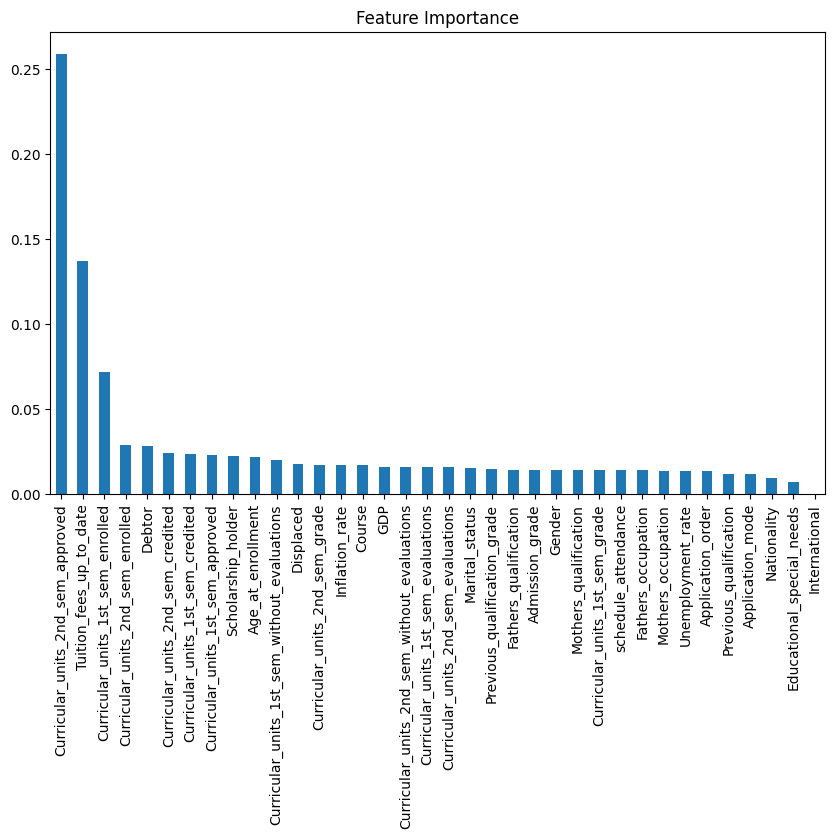

Curricular_units_2nd_sem_approved               0.258797
Tuition_fees_up_to_date                         0.137089
Curricular_units_1st_sem_enrolled               0.071897
Curricular_units_2nd_sem_enrolled               0.029036
Debtor                                          0.028168
Curricular_units_2nd_sem_credited               0.024243
Curricular_units_1st_sem_credited               0.023588
Curricular_units_1st_sem_approved               0.022935
Scholarship_holder                              0.022522
Age_at_enrollment                               0.021427
Curricular_units_1st_sem_without_evaluations    0.019904
Displaced                                       0.017554
Curricular_units_2nd_sem_grade                  0.017156
Inflation_rate                                  0.017067
Course                                          0.016846
GDP                                             0.015987
Curricular_units_2nd_sem_without_evaluations    0.015658
Curricular_units_1st_sem_evalua

In [63]:
# Membuat Series dari nilai feature importance dengan nama kolom sebagai index
feat_importances = pd.Series(importances, index=x_test.columns)

# Mengurutkan nilai importance dari yang paling besar ke kecil
feat_importances = feat_importances.sort_values(ascending=False)

#  Memvisualisasikan variable yang paling berpengaruh terhadap model (feature importance)
plt.figure(figsize=(10,6))
feat_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

# Print Hasil importance
print(feat_importances)

**Permutation Importance from XGBoost Model**

In [64]:
# permutation based on performance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(first_iter_model, x_test, y_test)


Text(0.5, 0, 'Permutation Importance')

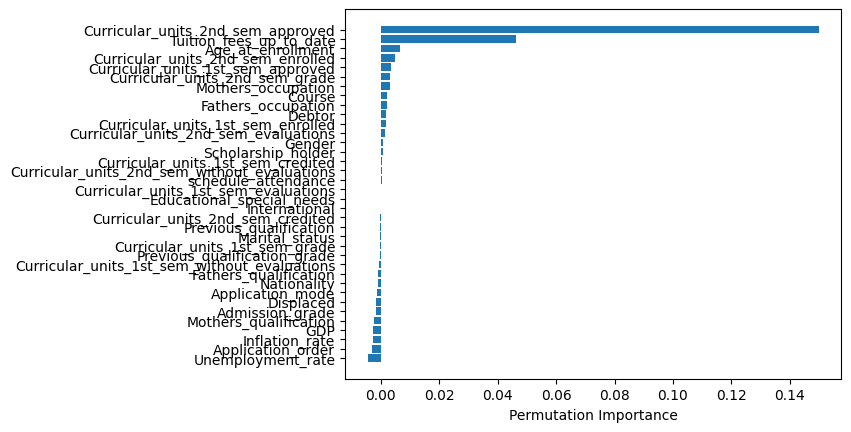

In [65]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(x_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

**SHAP value from XGBoost Model**

In [66]:
explainer = shap.TreeExplainer(first_iter_model)
shap_values = explainer.shap_values(x_test)

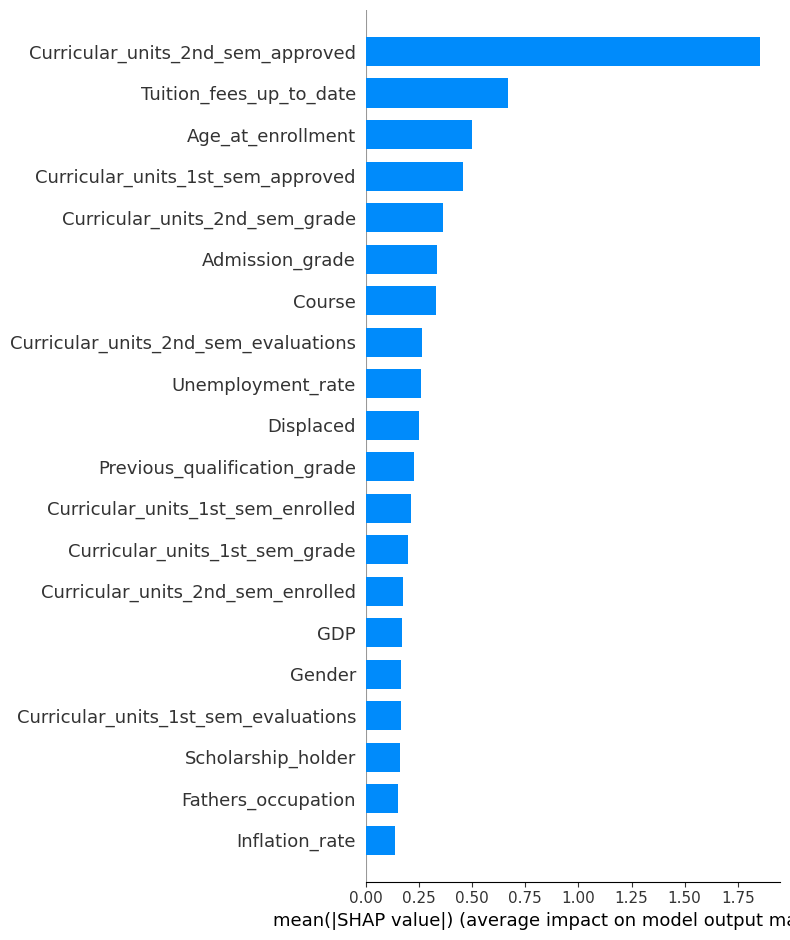

In [67]:
shap.summary_plot(shap_values, x_test, plot_type="bar");

In [68]:
shap_global_importance = pd.Series(np.abs(shap_values).mean(axis=0), index=x_test.columns)
shap_global_importance = shap_global_importance.sort_values(ascending=False)

# 20 nama kolom fitur teratas
top_20_features = shap_global_importance.head(20).index.tolist()

print(f"20 Fitur Teratas yang Dipilih oleh SHAP:\n{top_20_features}")

20 Fitur Teratas yang Dipilih oleh SHAP:
['Curricular_units_2nd_sem_approved', 'Tuition_fees_up_to_date', 'Age_at_enrollment', 'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_grade', 'Admission_grade', 'Course', 'Curricular_units_2nd_sem_evaluations', 'Unemployment_rate', 'Displaced', 'Previous_qualification_grade', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_enrolled', 'GDP', 'Gender', 'Curricular_units_1st_sem_evaluations', 'Scholarship_holder', 'Fathers_occupation', 'Inflation_rate']


**Saving csv file to create dashboard**

In [69]:
# Save new CSV file
df.to_csv('data_cleaned.csv', index=False)

### **Insight**

Berdasarkan hasil pelatihan model pada iterasi pertama kita dapat lihat bahwa diantara 3 model terbaik itu adalah XGBoost Classifier dengan akurasi pelatihan hampir 100% dan juga akurasi testing sekitar 86%. Setelah itu kita lakukan beberapa metode untuk mengetahui fitur apa yang paling berpengaruh pada kasus klasifikasi mahasiswa institut maju jaya.

Terdapat 3 buah metode yang merupakaan bawaan dari model XGBoost Classifier. Akan tetapi setiap metode memiliki keunggulan tersendiri yakni:
1.  Feature Importance : Metode ini memberikan gambaran umum yang cepat tentang fitur mana yang paling sering atau paling banyak berkontribusi pada model, akan tetapi memiliki bias terhadap fitur yang memiliki kardinalitas tinggi seperti fitur numerik.
2.  Permutation Importance : Metode ini bekerja dengan mengukur seberapa banyak kinerja model (misalnya, akurasi atau F1-score) menurun ketika nilai-nilai dari suatu fitur diacak (di-permutasi) secara acak pada data test. Akan tetapi memiliki bias jika dua fitur yang sangat berkolerasi, mengacak salah satunya mungkin tidak menunjukkan penurunan kinerja yang besar karena informasi masih terkandung dalam fitur lainnya.
3.  SHAP (SHapley Additive exPlanations) Values : Metode ini memperhitungkan kontribusi dari setiap fitur terhadap prediksi model untuk setiap instansi/observasi individu. Akan tetapi sama seperti Permutation Importance, dalam kasus fitur yang sangat berkorelasi, SHAP mungkin membagi "kredit" secara tidak merata atau bisa membuat interpretasi sedikit lebih rumit, meskipun ini lebih baik daripada metode lain

Oleh karena itu berdasarkan hasil training dan evaluasi model pada iterasi pertama ini penulis menyimpulkan bahwa penulis akan menggunakan XGBoost sebagai model nya, dan juga menggunakan variabel yang di rekomendasi oleh hasil shap value pada data test. Terdapat 20 fitur yang dihasilkan oleh shap value dimana yang terbesar merupakan fitur numerik yakni `Curricular_units_2nd_sem_approved`.

## **Data Preparation - Second Iteration**

**Objectives**:

To prepare normalized data that is ready to be used for training the model, and to remove features that have minimal influence based on feature importance analysis.

Out of the 36 variables used in the first iteration, we decided to used 20 features from shap value feature importance


**Steps Performed:**

- ✅ Split dataset into `training set` and `testing set` to evaluate model generalization.

- ✅ Encode categorical variables using LabelEncoder to convert them into numerical format. The encoder was saved using joblib for use during inference.

- ✅ Standardize numerical features using StandardScaler to ensure they have a mean of 0 and a standard deviation of 1. The scaler was also saved using joblib

- ✅ Drop unimportant features based on feature importance scores obtained from the first iteration of model training, to reduce overfitting and simplify the model.

In [70]:
x_v2 = df[[
        'Curricular_units_2nd_sem_approved',
        'Tuition_fees_up_to_date', 'Age_at_enrollment',
        'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_grade','Admission_grade', 'Course', 'Curricular_units_2nd_sem_evaluations',
        'Unemployment_rate', 'Displaced', 'Previous_qualification_grade',
        'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_grade',
        'Curricular_units_2nd_sem_enrolled', 'GDP', 'Gender','Curricular_units_1st_sem_evaluations',
        'Scholarship_holder','Fathers_occupation','Inflation_rate'
        ]]

y_v2 = df['Status']

In [71]:
x_v2.shape

(4424, 20)

In [72]:
x_v2.head()

,Curricular_units_2nd_sem_approved,Tuition_fees_up_to_date,Age_at_enrollment,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_grade,Admission_grade,Course,Curricular_units_2nd_sem_evaluations,Unemployment_rate,Displaced,Previous_qualification_grade,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,GDP,Gender,Curricular_units_1st_sem_evaluations,Scholarship_holder,Fathers_occupation,Inflation_rate
0,0,yes,20,0,0.00,127.3,Animation and Multimedia Design,0,10.8,yes,122.0,0,0.00,0,1.74,male,0,no,Unskilled Labor,1.4
1,6,no,19,6,13.67,142.5,Tourism,6,13.9,yes,160.0,6,14.00,6,0.79,male,6,no,Professional/Managerial,-0.3
2,0,no,19,0,0.00,124.8,Communication Design,0,10.8,yes,122.0,6,0.00,6,1.74,male,0,no,Unskilled Labor,1.4
3,5,yes,20,6,12.40,119.6,Journalism and Communication,10,9.4,yes,122.0,6,13.43,6,-3.12,female,8,no,Professional/Managerial,-0.8
4,6,yes,45,5,13.00,141.5,Social Service,6,13.9,no,100.0,6,12.33,6,0.79,female,9,no,Unskilled Labor,-0.3


In [73]:
x_num_v2 = x_v2.select_dtypes(include=['float64', 'int64'])
x_cat_v2 = x_v2.select_dtypes(include=['object', 'category'])

In [74]:
# Normalization data numerical_column with Standar Scaler
scaler_v2 = StandardScaler()
x_num_scaled_v2 = pd.DataFrame(scaler_v2.fit_transform(x_num_v2), columns=x_num_v2.columns)
x_num_scaled_v2

,Curricular_units_2nd_sem_approved,Age_at_enrollment,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_grade,Admission_grade,Curricular_units_2nd_sem_evaluations,Unemployment_rate,Previous_qualification_grade,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,GDP,Curricular_units_1st_sem_evaluations,Inflation_rate
0,-1.471527,-0.430363,-1.521257,-1.963484,0.022229,-2.042630,-0.287638,-0.804841,-2.528560,-2.197107,-2.838337,0.765761,-1.986068,0.124386
1,0.518904,-0.562168,0.418050,0.660201,1.071926,-0.522682,0.876222,2.076819,-0.109105,0.693593,-0.105726,0.347199,-0.550192,-1.105222
2,-1.471527,-0.562168,-1.521257,-1.963484,-0.150419,-2.042630,-0.287638,-0.804841,-0.109105,-2.197107,-0.105726,0.765761,-1.986068,0.124386
3,0.187165,-0.430363,0.418050,0.416450,-0.509526,0.490616,-0.813253,-0.804841,-0.109105,0.575900,-0.105726,-1.375511,-0.071567,-1.466871
4,0.518904,2.864765,0.094832,0.531608,1.002867,-0.522682,0.876222,-2.473171,-0.109105,0.348774,-0.105726,0.347199,0.167746,-1.105222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.187165,-0.562168,0.094832,0.468271,-0.329972,-0.016033,1.476924,-0.577342,-0.109105,0.611001,-0.105726,-1.789667,-0.310879,1.137005
4420,-0.808050,-0.693973,0.418050,0.147748,-0.550961,-0.522682,-0.175007,-0.956508,-0.109105,0.280636,-0.105726,0.889126,-0.550192,-0.454253
4421,-1.139788,0.887688,0.741268,0.627573,1.555339,0.237291,0.876222,1.621820,0.294137,0.881488,0.805144,0.347199,-0.071567,-1.105222
4422,0.187165,-0.430363,0.094832,0.339678,1.852293,-0.522682,-0.813253,3.593483,-0.512348,0.652297,-0.561161,-1.375511,-0.789505,-1.466871


In [75]:
# LabelEncoder for multiclass features
label_encoder_dict_v2 = {}
x_cat_encoded_v2 = x_cat_v2.copy()
for col in x_cat_v2.columns:
    le = LabelEncoder()
    x_cat_encoded_v2[col] = le.fit_transform(x_cat_v2[col])
    label_encoder_dict_v2[col] = le


In [76]:
# Merging data for model_v2
feature_v2 = pd.concat([x_cat_encoded_v2, x_num_scaled_v2], axis=1)
feature_v2

,Tuition_fees_up_to_date,Course,Displaced,Gender,Scholarship_holder,Fathers_occupation,Curricular_units_2nd_sem_approved,Age_at_enrollment,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_grade,Admission_grade,Curricular_units_2nd_sem_evaluations,Unemployment_rate,Previous_qualification_grade,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,GDP,Curricular_units_1st_sem_evaluations,Inflation_rate
0,1,2,1,1,0,8,-1.471527,-0.430363,-1.521257,-1.963484,0.022229,-2.042630,-0.287638,-0.804841,-2.528560,-2.197107,-2.838337,0.765761,-1.986068,0.124386
1,0,13,1,1,0,4,0.518904,-0.562168,0.418050,0.660201,1.071926,-0.522682,0.876222,2.076819,-0.109105,0.693593,-0.105726,0.347199,-0.550192,-1.105222
2,0,5,1,1,0,8,-1.471527,-0.562168,-1.521257,-1.963484,-0.150419,-2.042630,-0.287638,-0.804841,-0.109105,-2.197107,-0.105726,0.765761,-1.986068,0.124386
3,1,8,1,0,0,4,0.187165,-0.430363,0.418050,0.416450,-0.509526,0.490616,-0.813253,-0.804841,-0.109105,0.575900,-0.105726,-1.375511,-0.071567,-1.466871
4,1,12,0,0,0,8,0.518904,2.864765,0.094832,0.531608,1.002867,-0.522682,0.876222,-2.473171,-0.109105,0.348774,-0.105726,0.347199,0.167746,-1.105222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,8,0,1,0,4,0.187165,-0.562168,0.094832,0.468271,-0.329972,-0.016033,1.476924,-0.577342,-0.109105,0.611001,-0.105726,-1.789667,-0.310879,1.137005
4420,0,8,1,0,0,8,-0.808050,-0.693973,0.418050,0.147748,-0.550961,-0.522682,-0.175007,-0.956508,-0.109105,0.280636,-0.105726,0.889126,-0.550192,-0.454253
4421,1,10,1,0,1,8,-1.139788,0.887688,0.741268,0.627573,1.555339,0.237291,0.876222,1.621820,0.294137,0.881488,0.805144,0.347199,-0.071567,-1.105222
4422,1,9,1,0,1,4,0.187165,-0.430363,0.094832,0.339678,1.852293,-0.522682,-0.813253,3.593483,-0.512348,0.652297,-0.561161,-1.375511,-0.789505,-1.466871


In [77]:
le_y = LabelEncoder()
y_lab_v2 = le_y.fit_transform(y_v2)

In [78]:
#splitting data into a data train and data test
x_train_v2, x_test_v2, y_train_v2, y_test_v2 = train_test_split(feature_v2, y_lab_v2, test_size=0.2, random_state=21)

## **Modeling - Second Iteration**

This iteration aims to build an initial model for screening issues in higher education, using commonly available features typically found in higher education enrollment data.

**Objectives**

- ✅ Algorithm Used: `XGBoostClassifier`
- ✅ Features Used: 20 predictor variables
- ✅ Target Variable: `Status`

**Result**

- ✅ Model Accuracy: 99%

In [79]:
model_v2 = XGBClassifier()
model_v2.fit(x_train_v2, y_train_v2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [80]:
accuracy_v2 = model_v2.score(x_train_v2, y_train_v2)
print("Training Model_v2 Accuracy:", accuracy_v2)

Training Model_v2 Accuracy: 0.9997174343034756


## **Evaluation & Insights - Second Iteration**

**Model Results:**

✅ Testing accuracy achieved: 86%

✅ The final model (`Model_v2`), scaler (`scaler_v2`), and encoder (`encoder_v2`) were saved using `joblib`. These artifacts will be used for deployment in the `Streamlit` application.


In [81]:
accuracy_test_v2 = model_v2.score(x_test_v2, y_test_v2)
print("Testing Model_v2 Accuracy:", accuracy_test_v2)

Testing Model_v2 Accuracy: 0.8666666666666667


In [82]:
y_pred_v2 = model_v2.predict(x_test_v2)

In [83]:
# Buat Classification Report dari hasil prediksi data test
target_names = [ 'Dropout', 'Non Dropout']

print(classification_report(y_test_v2, y_pred_v2, target_names=target_names))

              precision    recall  f1-score   support

     Dropout       0.84      0.72      0.78       287
 Non Dropout       0.88      0.93      0.90       598

    accuracy                           0.87       885
   macro avg       0.86      0.83      0.84       885
weighted avg       0.87      0.87      0.86       885



**Saving model**

In [84]:
# Simpan model_v2 ke file
joblib.dump(model_v2, 'model/model_prediction.joblib')

# Menyimpan scaler_v2 model
joblib.dump(scaler_v2, 'model/scaler_v2.joblib')

# Menyimpan label_encoder pada model_v2
joblib.dump(label_encoder_dict_v2, 'model/label_encoder_v2.joblib')


['model/label_encoder_v2.joblib']

In [108]:
print("Model feature names:", model_v2.get_booster().feature_names)

Model feature names: ['Tuition_fees_up_to_date', 'Course', 'Displaced', 'Gender', 'Scholarship_holder', 'Fathers_occupation', 'Curricular_units_2nd_sem_approved', 'Age_at_enrollment', 'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_grade', 'Admission_grade', 'Curricular_units_2nd_sem_evaluations', 'Unemployment_rate', 'Previous_qualification_grade', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_enrolled', 'GDP', 'Curricular_units_1st_sem_evaluations', 'Inflation_rate']


### **Insight & Conlclusion Second Itetration**

Berdasarkan hasil iterasi kedua ini kita dapat menyimpulkan bahwa model XGBoost tetap stabil dan adaptif. Dilihat dari performa saat training dan testing data cenderung stabil. 20 Variabel yang digunakan juga merupakan variabel yang paling berpengaruh berdasarkan shap values sehingga tidak ada penurunan performa dari model baik dari segi akurasi traning maupun testing. Setelah ini model disimpan dalam bentuk `joblib` yang selanjutnya akan diaplikasikan/deployment berbassi website menggunakan streamlit.
